# 1. Install Dependencies and Import Libraries

In [1]:
pip install -r requirement.txt

In [2]:
import opendatasets as od
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgbm
import mnist_fashion_classification_function as f
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import SCORERS
from sklearn.metrics import precision_recall_curve
from lazypredict.Supervised import LazyClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier


%matplotlib inline
sns.set_theme(style="whitegrid", palette="tab10")

# 2. Import Fashion MNIST Dataset

## 2.1 Downloading Fashion MNIST Dataset from Kaggle

In [3]:
#download dataset from kaggle
od.download("https://www.kaggle.com/datasets/zalando-research/fashionmnist")

Skipping, found downloaded files in ".\fashionmnist" (use force=True to force download)


## 2.2 Import Downloaded Train & Test Dataset

In [4]:
#set variable for train and test dataset
train = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

In [5]:
#load class label
label = pd.read_csv('fashionmnist/label.txt')
label

,label,fashion_name
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


In [6]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.3 Split The Training Data

In [8]:
#split training data
X, y, X_train, X_test, y_train, y_test = f.split_and_prepare_mnist_dataset(train)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((48000, 784), (48000,), (12000, 784), (12000,))

# 3. Quick Data Overview

In [10]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


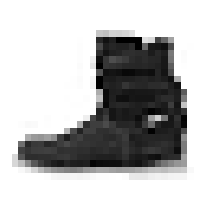

In [11]:
#plot ankle boot images
plt.figure(figsize=(2,2), dpi=120)
ankle_boot = X[-5]
ankle_boot_image = ankle_boot.reshape(28, 28)
plt.imshow(ankle_boot_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

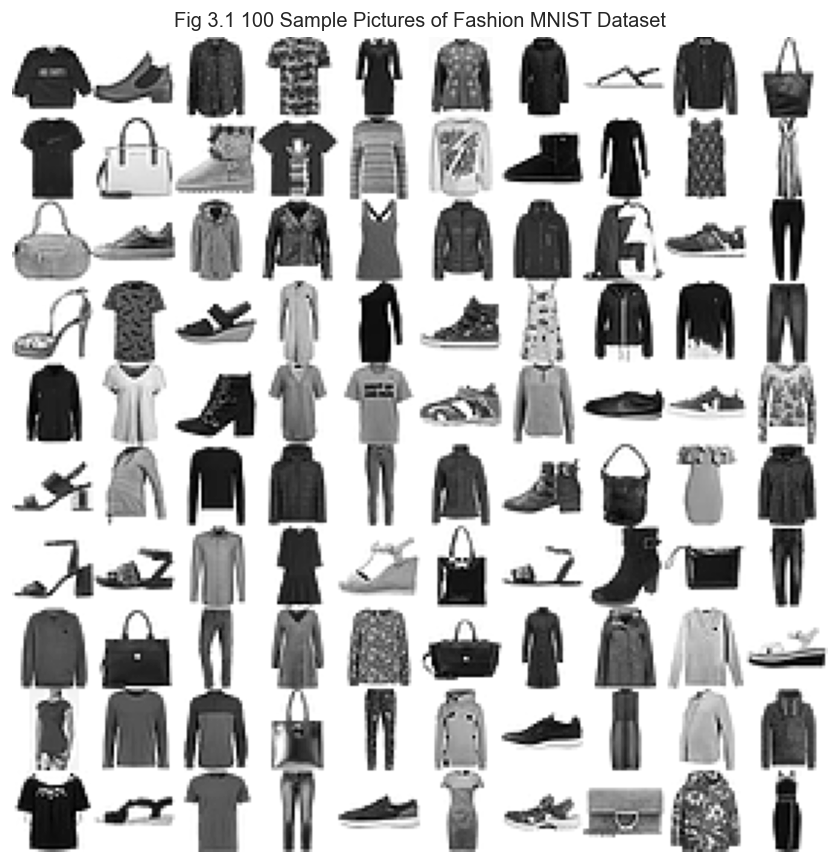

In [12]:
#plot sample images
plt.figure(figsize=(9,9), dpi=120)
example_images = X[:100]
f.plot_images(example_images, images_per_row=10)
plt.title('Fig 3.1 100 Sample Pictures of Fashion MNIST Dataset')
plt.show()

In [13]:
#check number of null data
train.isna().sum().sum()

0

In [14]:
#check class label proportion of train dataset
fashion_name_count = pd.merge(train, label, 'left', 'label')
fashion_name_count = fashion_name_count[['fashion_name', 'pixel1']].groupby('fashion_name').count().reset_index()
fashion_name_count.columns = ['fashion_name', 'value_counts']
fashion_name_count

,fashion_name,value_counts
0,Ankle boot,6000
1,Bag,6000
2,Coat,6000
3,Dress,6000
4,Pullover,6000
5,Sandal,6000
6,Shirt,6000
7,Sneaker,6000
8,T-shirt/top,6000
9,Trouser,6000


Text(0, 0.5, 'Fashion Name')

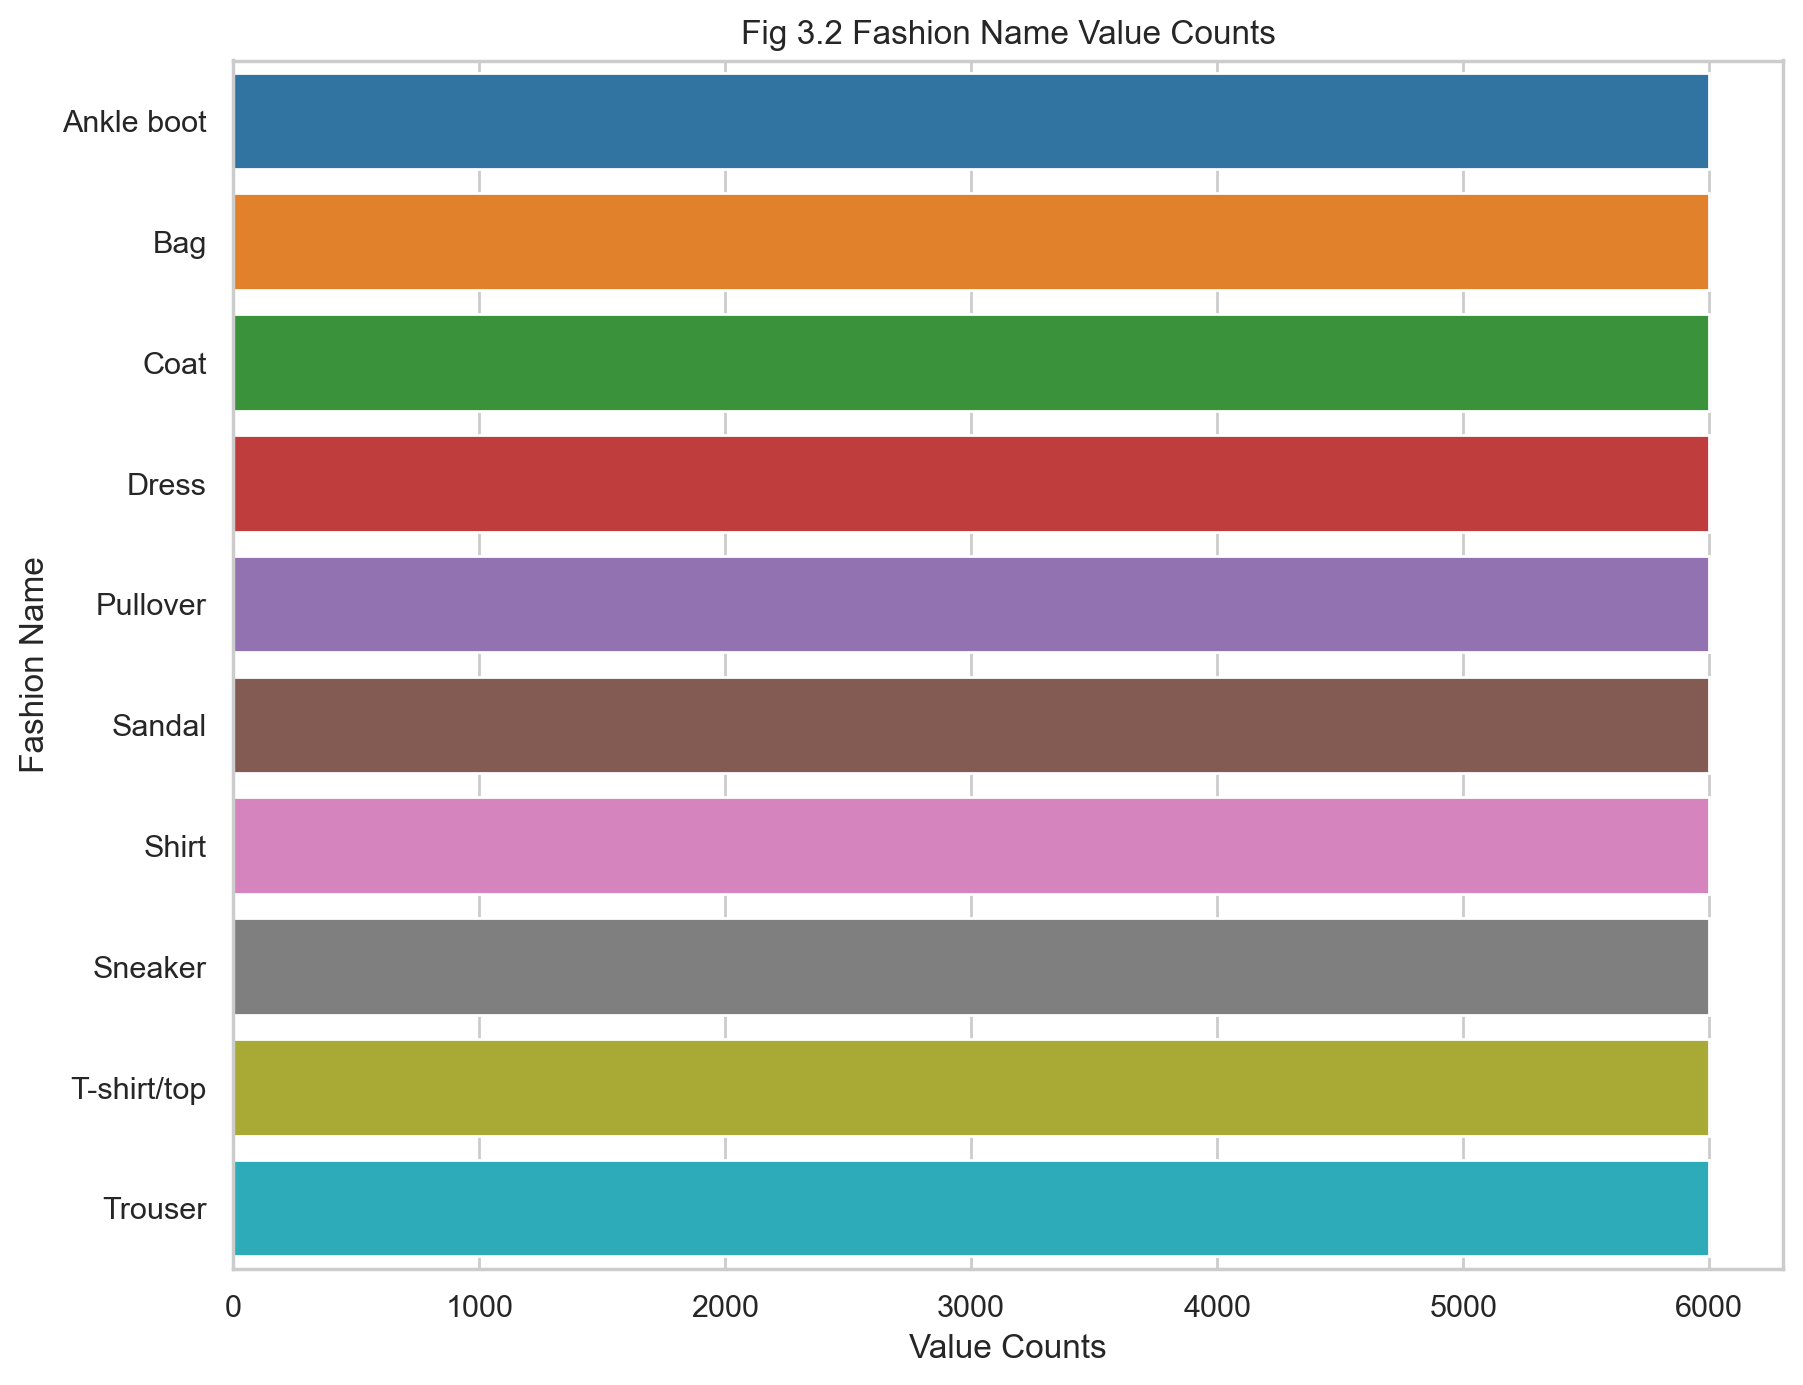

In [15]:
# plot class label proportion
plt.figure(figsize=(10, 8), dpi=200)
sns.barplot(data=fashion_name_count, y='fashion_name', x='value_counts', orient='h')
plt.title('Fig 3.2 Fashion Name Value Counts')
plt.xlabel('Value Counts')
plt.ylabel('Fashion Name')

**Key Takeaway:** Looking at figure 3.1 above, we could say that every fashion name or label has an equal proportion. How fortunate!

# 4. Training a Binary Classifier

In this section, we started a simple model for binary classification in order to understand the concept of multiclass classification. For instance, we need to classify only for an ankle boot or label 9 (whether the picture is an ankle boot or not). Let's get started!

## 4.1 Modify The Label Data

First, we have to modify `y_train` & `y_test` data. If the fashion is ankle boot, then the label is `True`, else is `False`.

In [16]:
y_train_ankle_boot = (y_train==9)
y_test_ankle_boot = (y_test==9)

In [17]:
y_test_ankle_boot

array([False, False, False, ...,  True, False, False])

In [18]:
y_train_ankle_boot

array([False, False, False, ...,  True, False, False])

## 4.2 Model Selection with Lazy Classifier

In [19]:
clf = LazyClassifier(ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train_ankle_boot, y_test_ankle_boot)
models

100%|██████████| 29/29 [11:44<00:00, 24.28s/it]  


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.99,0.98,0.98,0.99,22.87
LGBMClassifier,0.99,0.98,0.98,0.99,11.63
XGBClassifier,0.99,0.98,0.98,0.99,26.26
Perceptron,0.98,0.97,0.97,0.98,3.00
SVC,0.99,0.97,0.97,0.99,126.49
ExtraTreesClassifier,0.99,0.97,0.97,0.99,30.68
AdaBoostClassifier,0.99,0.97,0.97,0.99,109.11
RandomForestClassifier,0.99,0.96,0.96,0.99,43.64
LogisticRegression,0.99,0.96,0.96,0.99,5.37


As you can see, the output of the lazy classifier consists of 26 classification models complete with some performance measures like `accuracy`, `balanced accuracy`, `ROC AUC`, & `F1 Score`. The question is, what performance measures that we need to consider? it depends...

The selection of performance measures depends on the use case requirements and data characteristics like proportion of label. 

* `Accuracy` metric is a perfect fit when the data label is balanced because of the formula of this metric. The formula is TP + TN / (TP + TN + FP + FN). If the data is highly unbalanced (like this binary case), `accuracy` is a no-go, Why? for example, suppose we have a new model called `never ankle boot classifier` that always classified the `ankle boot` data as `False`. The accuracy is still high ((0+54000)/(60000) = 0.9 even if TP = 0). 

* `Balanced accuracy` is more reliable for imbalanced datasets than `accuracy` because these metrics consider both `sensitivity` and `specificity`. The formula of `balanced accuracy` is (`sensitivity` + `specificity`)/2. `Sensitivity` or `recall` formula = TP/(TP + FN) and `specificity` or `true negative rate` formula = TN/(FP + TN). So the `sensitivity` and `specificity` values for `never ankle boot classifier` is 0 and 1. Then the `balanced accuracy` = (0+1)/2 = 0.5 (see the differences!).

* `Receiving operating characteristic (ROC)` is a useful metric and usually served as a two-dimensional graph X-axis = `false positive rate (FPR)` and Y-axis = `true positive rate (TPR)` (as you can see on the example `ROC` graph below). The function of the graph is to show the trade-off between `FPR` and `TPR` (The higher the `TPR`, the more high the `FPR`). To summarize the performance of `The ROC Curve`, there is `area under curve (AUC)` that basically calculates the area of under the `ROC` curve. If the `AUC` value is = 0.5, then the model is completely random. The `ROC AUC` value for `never ankle boot classifier` is 0.5 which means the model prediction is completely random.

Fig 4.1 ROC Curve Illustration

<img src='images/ROC Curve.png' width="500" height="500">
source: https://en.wikipedia.org/wiki/Receiver_operating_characteristic

* `F1 Score` is a combination of `precision` and `recall` (will be explained in 4.4.2) into one metric by calculating their harmonic mean. The formula of F1 Score is TP/(TP+1/2(FP+FN)). The `F1 Score` of `never ankle boot classifier` prediction is 0 because of TP = 0. 

So, based on the elaboration above, what performance measure to choose? well in this binary case, it is obvious that we can't use the `accuracy` metric due to data imbalance. Because of that data characteristics, we need to only focus on true positive values ('True' values) than true negative values ('False' values). `Balanced accuracy` is still considering the true negative values by the presence of `specificity` or `true negative rate` on its formula. Likewise, the `ROC AUC` metric is also using true negative values but the sensitivity on imbalanced data is worse than `balanced accuracy`. Lastly, the `F1 Score` is a great metric for this case because this metric doesn't care about negative values at all. So the performance metrics priority is `F1 Score` > `balanced accuracy` > `ROC AUC`.

In [20]:
models.sort_values(['F1 Score', 'Balanced Accuracy', 'ROC AUC', 'Time Taken'],ascending=[False, False, False, True])

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.99,0.98,0.98,0.99,11.63
XGBClassifier,0.99,0.98,0.98,0.99,26.26
SVC,0.99,0.97,0.97,0.99,126.49
RandomForestClassifier,0.99,0.96,0.96,0.99,43.64
ExtraTreesClassifier,0.99,0.97,0.97,0.99,30.68
KNeighborsClassifier,0.99,0.98,0.98,0.99,22.87
AdaBoostClassifier,0.99,0.97,0.97,0.99,109.11
LogisticRegression,0.99,0.96,0.96,0.99,5.37
BaggingClassifier,0.99,0.95,0.95,0.99,164.07


Based on the sorted model above, we can see that `LGBMClassifier` and `XGBClassifier` is a great models for this case. But to give context on how good those two models are, we can also compare it with `Random Forest Classifier`.

## 4.3 Train the Models

In [21]:
#Train light gbm classifier
lgbm_clf = lgbm.LGBMClassifier()
lgbm_clf.fit(X_train, y_train_ankle_boot)

LGBMClassifier()

In [22]:
lgbm_clf.predict([ankle_boot])

array([ True])

In [23]:
cross_val_score(lgbm_clf, X_train, y_train_ankle_boot, cv=3, scoring="balanced_accuracy")

array([0.97605685, 0.97262648, 0.97238413])

In [24]:
#Train xgboost classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train_ankle_boot)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [25]:
xgb_clf.predict([ankle_boot])

array([1])

In [26]:
cross_val_score(xgb_clf, X_train, y_train_ankle_boot, cv=3, scoring="balanced_accuracy")

array([0.97469958, 0.96963512, 0.97349696])

In [27]:
#Train random forest classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train_ankle_boot)

RandomForestClassifier()

In [28]:
rf_clf.predict([ankle_boot])

array([ True])

In [29]:
cross_val_score(rf_clf, X_train, y_train_ankle_boot, cv=3, scoring="balanced_accuracy")

array([0.95990584, 0.95363297, 0.95537328])

## 4.4 Binary Classifier Performance Measures

In this section we comparing the performance metric like confusion matrix, precision-recall trade-off, & roc curve between two models.

### 4.4.1 Confusion Matrix

Confusion matrix is one of performance measure for classification task. Confusion matrix is basically a matrix (obviously) that consist of two rows and two columns. Each rows in confusion matrix represent the `actual class` and each columns represent the `predicted class`.

Fig 4.2 Confusion Illustration

<img src='images/Confusion Matrix.png' width="500" height="500">

`True negative` is when the model predicted class as `negative` and the actual values is also `negative`, `false negative` or `type 2 error` is when the model wrongly predicted class as `negative` when the actual values is `positive`, `false positive` or `type 1 error` is when then model wrongly predicted class as `positive` when the actual values is `negative`, and then `true positive` is when the model correctly predicted class as `positive`.

In [30]:
#lgbm classifier confusion matrix
y_train_pred_lgbm = cross_val_predict(lgbm_clf, X_train, y_train_ankle_boot, cv=5)

In [31]:
lgbm_cm = confusion_matrix(y_train_ankle_boot, y_train_pred_lgbm)
lgbm_cm = pd.DataFrame(lgbm_cm, ['Actual False', 'Actual True'], ['Predicted False', 'Predicted True'])
lgbm_cm

,Predicted False,Predicted True
Actual False,43028,182
Actual True,227,4563


In [32]:
#xgboost classifier confusion matrix
y_train_pred_xgb = cross_val_predict(xgb_clf, X_train, y_train_ankle_boot, cv=5)

In [33]:
xgb_cm = confusion_matrix(y_train_ankle_boot, y_train_pred_xgb)
xgb_cm = pd.DataFrame(xgb_cm, ['Actual False', 'Actual True'], ['Predicted False', 'Predicted True'])
xgb_cm

,Predicted False,Predicted True
Actual False,43027,183
Actual True,229,4561


In [34]:
#random forest classifier confusion matrix
y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train_ankle_boot, cv=5)

In [35]:
rf_cm = confusion_matrix(y_train_ankle_boot, y_train_pred_rf)
rf_cm = pd.DataFrame(rf_cm, ['Actual False', 'Actual True'], ['Predicted False', 'Predicted True'])
rf_cm

,Predicted False,Predicted True
Actual False,43007,203
Actual True,378,4412


### 4.4.2 Precision & Recall

The confusion matrix only classifies the predicted result and actual result as is. It's a great metrics, but we need more concise metrics to summarize the model performance of positive values (which is good for imbalanced datasets). The perfect metric for that point of view is `precision` & `recall`. 

* `Precision` or `positive predictive value (PPV)` is basically an accuracy but only for positive values as you can see on the formula of `precision` is TP/(TP+FP). Based on that formula, we can interpretate that `precision` is ratio of correct positive prediction prior to all predicted positive value (just like its name). 

* `Recall` or `sensitiviy` or `true positive rate (TPR)` is so similar to `precision` yet so different. The formula of `recall` is TP/(TP+FN). From the formula, we can interpretate that `recall` is ratio of correct positive prediction prior to all actual positive value. 

We can use Scikit-Learn to calculate `recall` and `precision`.

In [36]:
#calculate precision and recall score for lgbm classifier models
print('LGBM Precision Score: ',precision_score(y_train_ankle_boot, y_train_pred_lgbm))
print('LGBM Recall Score: ',recall_score(y_train_ankle_boot, y_train_pred_lgbm))

LGBM Precision Score:  0.9616438356164384
LGBM Recall Score:  0.9526096033402923


In [37]:
#calculate precision and recall score for xgboost classifier models
print('XGBoost Precision Score: ',precision_score(y_train_ankle_boot, y_train_pred_xgb))
print('XGBoost Recall Score: ',recall_score(y_train_ankle_boot, y_train_pred_xgb))

XGBoost Precision Score:  0.961424957841484
XGBoost Recall Score:  0.9521920668058456


In [38]:
#calculate precision and recall score for random forest classifier models
print('Random Forest Classifier Precision Score: ',precision_score(y_train_ankle_boot, y_train_pred_rf))
print('Random Forest Classifier Score: ',recall_score(y_train_ankle_boot, y_train_pred_rf))

DummyClassifier Precision Score:  0.9560130010834236
DummyClassifier Racall Score:  0.9210855949895616


### 4.4.3 Precision-Recall Trade-Off

In this section we plot the precision-recall vs predict probability threshold and precision-recall trade off. 

* The precision-recall vs predict probability plot is trying to show us how combination of precision & recall impact on prediction probability. Question is... What is prediction probability? prediction probability is the predicted class probability prior to each data instance. The output of predict_proba (prediction probability term on sklearn) is two columns, `column 0` is associated with `false class` and `column 1` is associated with `true class`. The predict probability threshold below is using `true class` as reference.

* The precision-recall trade-off is a plot that directly comparing of recall values (X-axis) against precision values (Y-axis).

#### XGBoost Classifier

In [39]:
y_scores_xgb = cross_val_predict(xgb_clf, X_train, y_train_ankle_boot, cv=3,
                             method="predict_proba")

In [40]:
precisions_xgb, recalls_xgb, thresholds_xgb = precision_recall_curve(y_train_ankle_boot, y_scores_xgb[:,1])

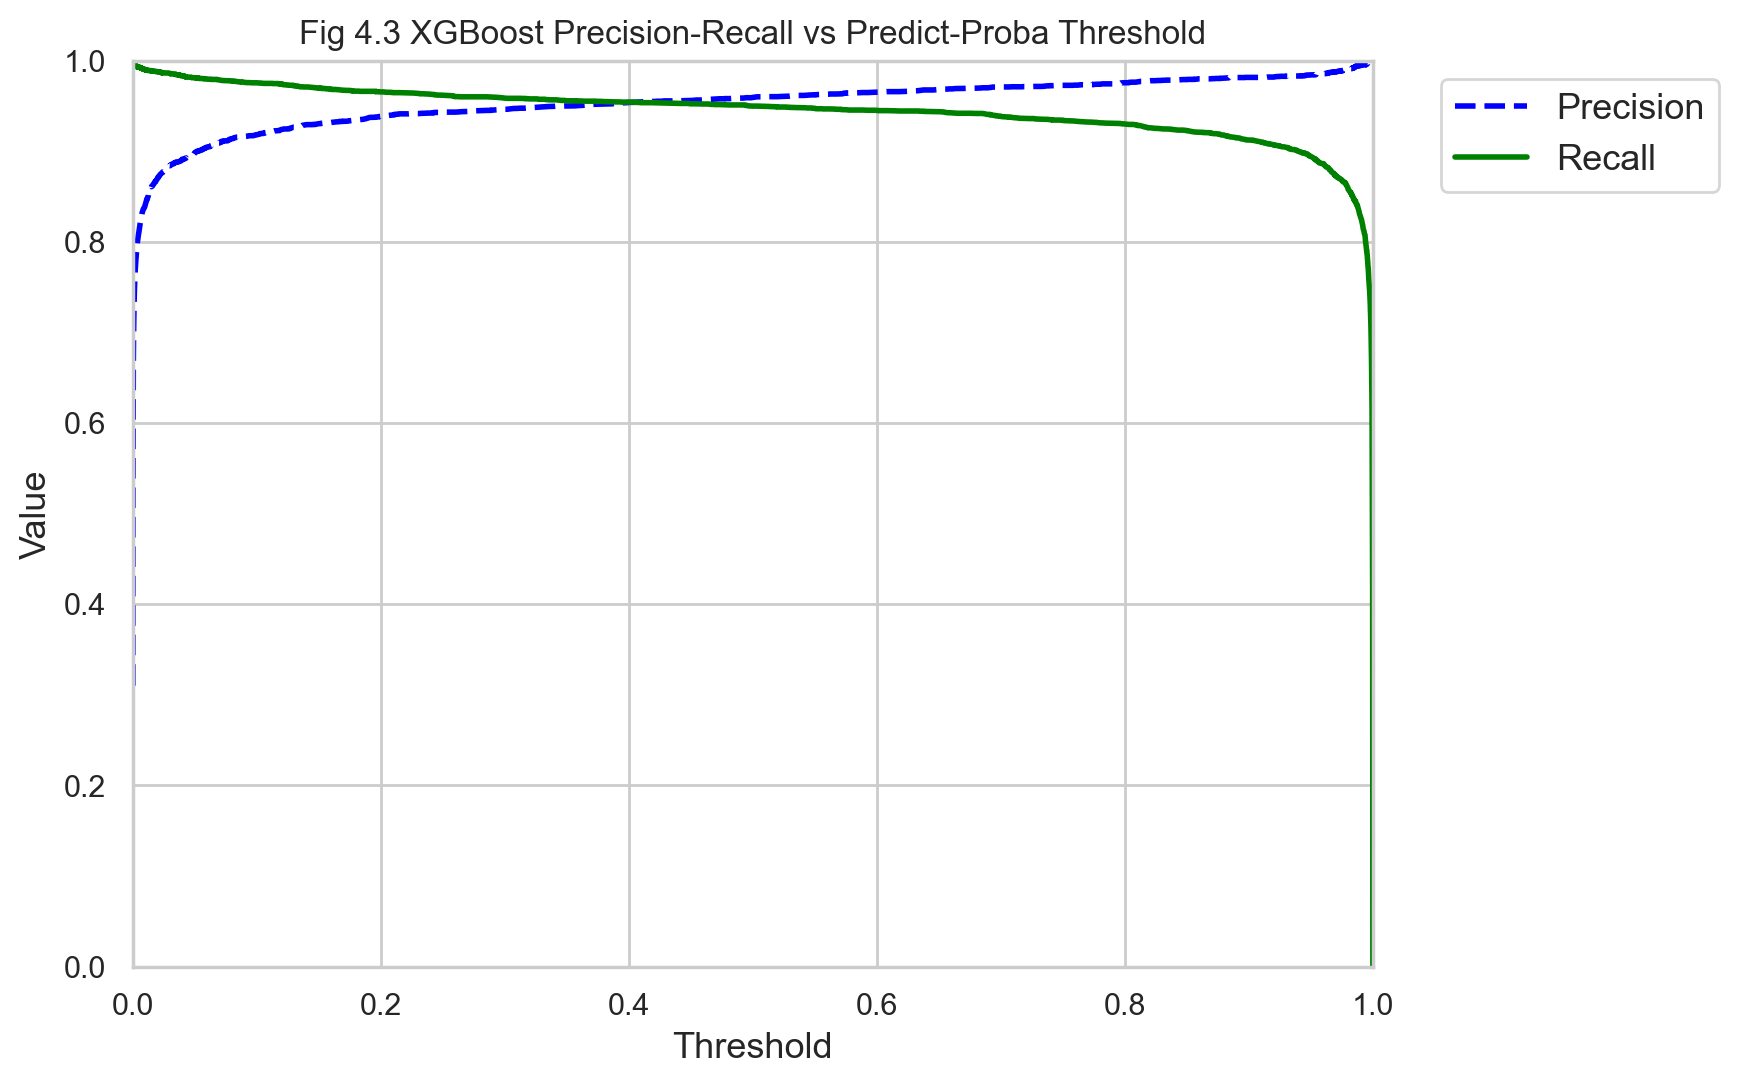

In [41]:
#plot precision-recall vs predict-proba threshold on XGBoost model
plt.figure(figsize=(8,6), dpi=200)
f.plot_precision_recall_vs_threshold(precisions_xgb, recalls_xgb, thresholds_xgb)
plt.ylabel('Value')
plt.title('Fig 4.3 XGBoost Precision-Recall vs Predict-Proba Threshold')
plt.show()

In [42]:
pr_pp_xgb = f.precision_recall_vs_threshold_df(thresholds_xgb, precisions_xgb, recalls_xgb)
pr_pp_xgb['prediction_probability']  = pr_pp_xgb['prediction_probability'].round(2)
pr_pp_xgb_grouped = pr_pp_xgb.groupby('prediction_probability').mean()
pr_pp_xgb_grouped

,precision,recall
prediction_probability,,
0.00,0.48,1.00
0.01,0.84,0.99
0.02,0.87,0.99
0.03,0.88,0.99
0.04,0.89,0.98
...,...,...
0.96,0.99,0.88
0.97,0.99,0.87
0.98,0.99,0.86


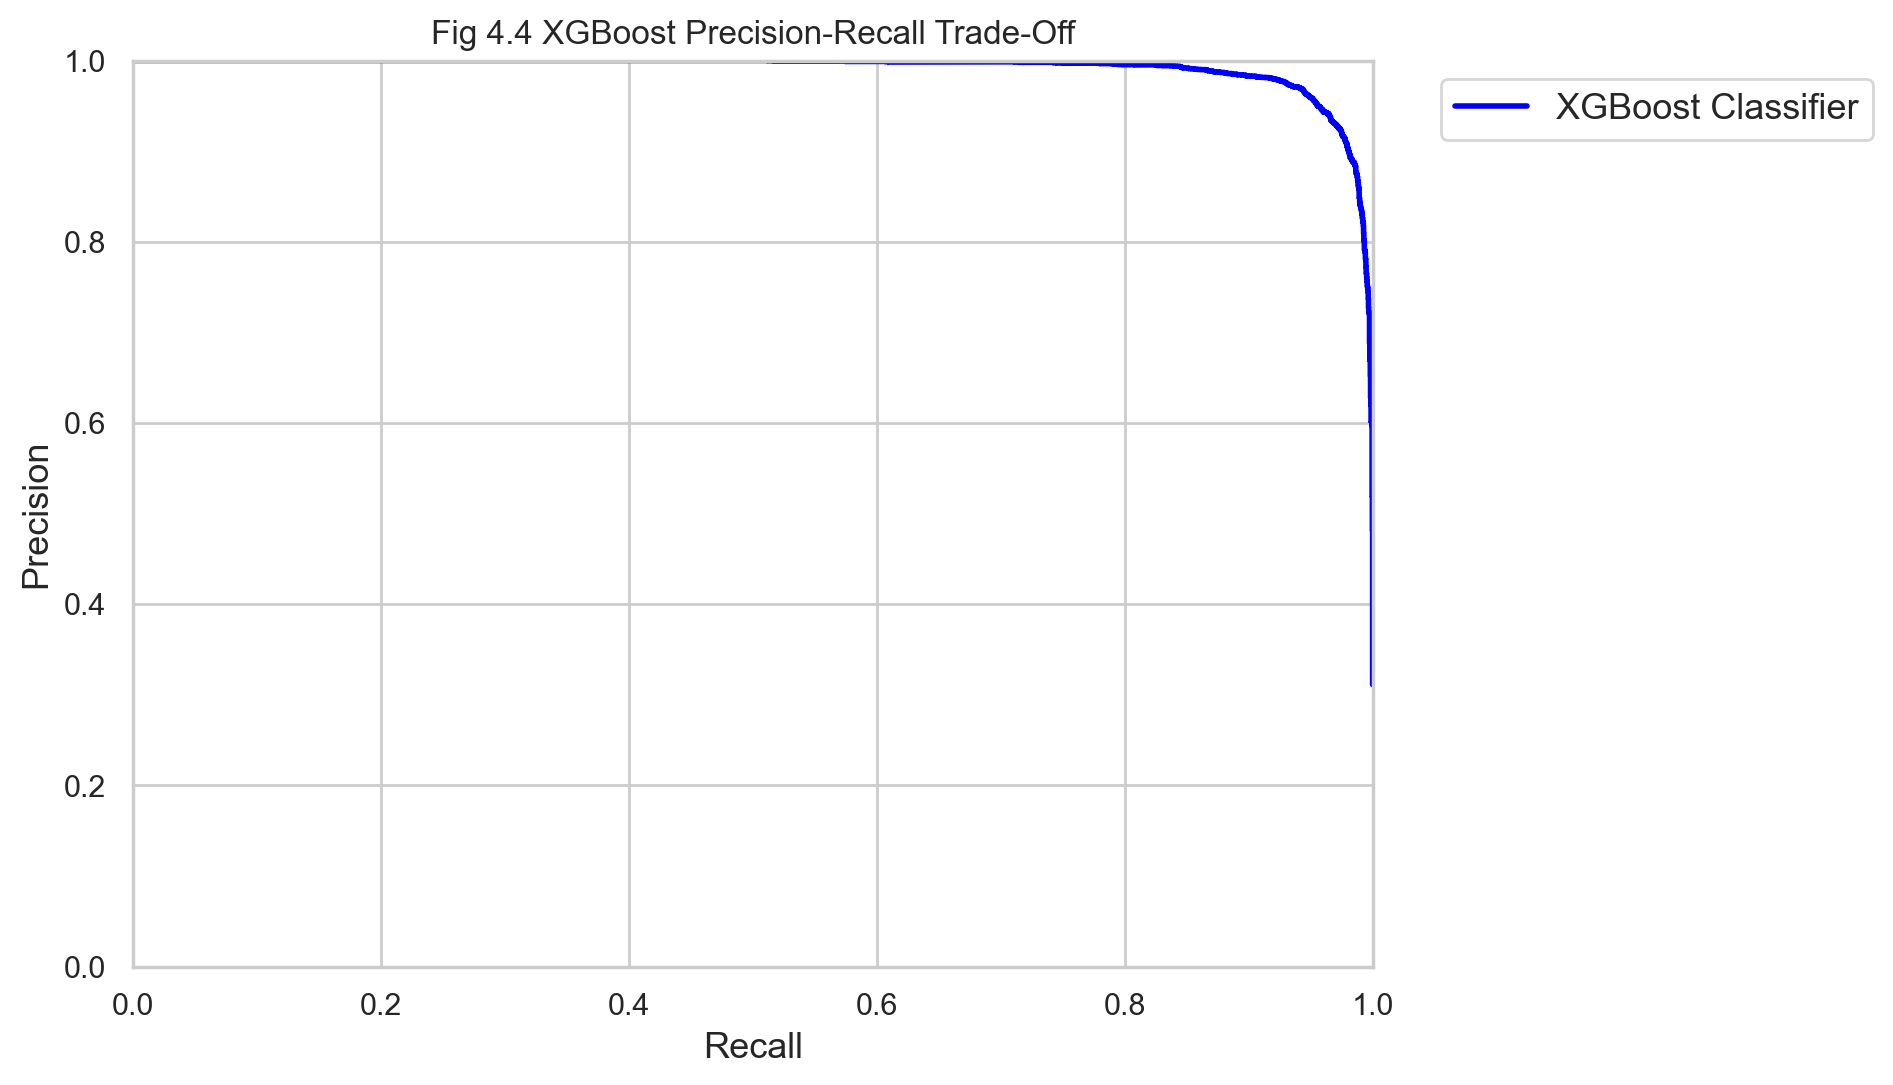

In [43]:
#plot precision-recall trade-off XGBoost model
plt.figure(figsize=(8, 6), dpi=200)
f.plot_precision_vs_recall(precisions_xgb, recalls_xgb, 'XGBoost Classifier')
plt.title('Fig 4.4 XGBoost Precision-Recall Trade-Off')
plt.show()

#### LGBM Classifier

In [44]:
y_scores_lgbm = cross_val_predict(lgbm_clf, X_train, y_train_ankle_boot, cv=3,
                             method="predict_proba")

In [45]:
precisions_lgbm, recalls_lgbm, thresholds_lgbm = precision_recall_curve(y_train_ankle_boot, y_scores_lgbm[:,1])

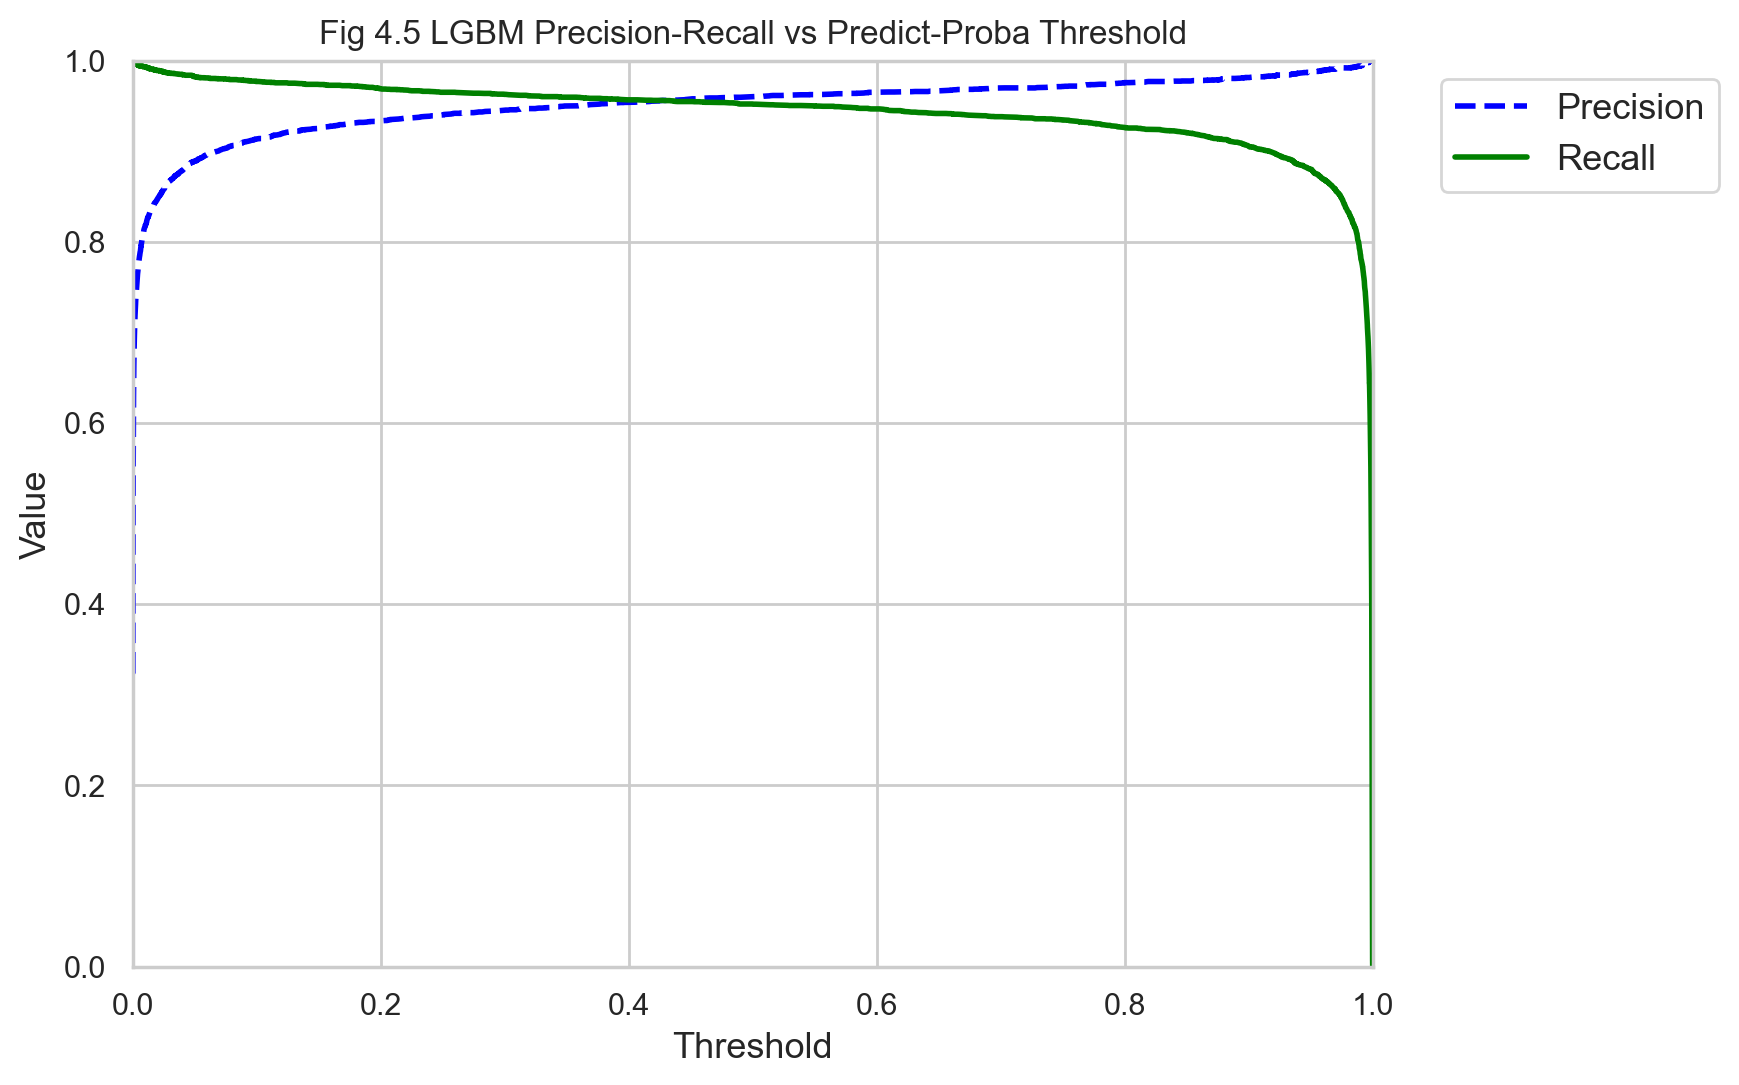

In [46]:
#plot precision-recall vs predict-proba threshold on lgbm model
plt.figure(figsize=(8,6), dpi=200)
f.plot_precision_recall_vs_threshold(precisions_lgbm, recalls_lgbm, thresholds_lgbm)
plt.ylabel('Value')
plt.title('Fig 4.5 LGBM Precision-Recall vs Predict-Proba Threshold')
plt.show()

In [47]:
pr_pp_lgbm = f.precision_recall_vs_threshold_df(thresholds_lgbm, precisions_lgbm, recalls_lgbm)
pr_pp_lgbm['prediction_probability']  = pr_pp_lgbm['prediction_probability'].round(2)
pr_pp_lgbm_grouped = pr_pp_lgbm.groupby('prediction_probability').mean()
pr_pp_lgbm_grouped

,precision,recall
prediction_probability,,
0.00,0.49,1.00
0.01,0.81,0.99
0.02,0.85,0.99
0.03,0.87,0.99
0.04,0.88,0.98
...,...,...
0.96,0.99,0.87
0.97,0.99,0.86
0.98,0.99,0.83


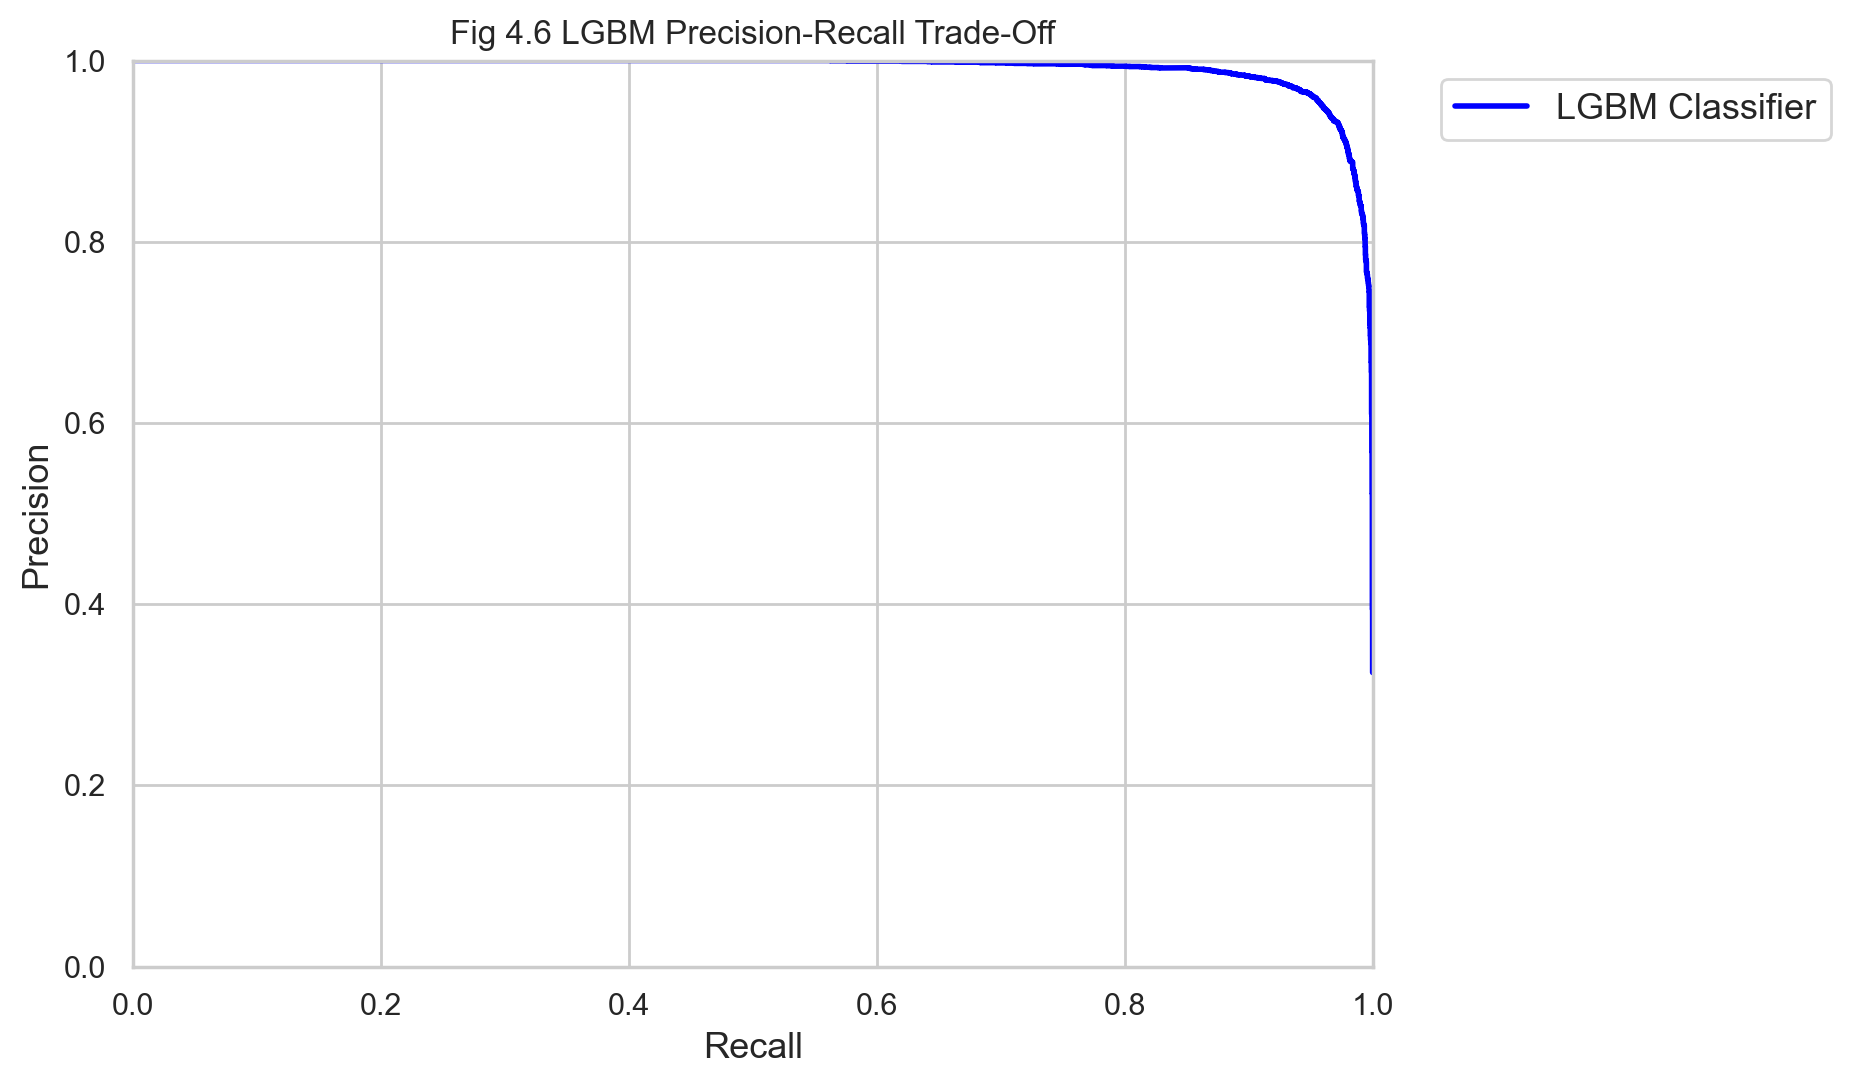

In [48]:
#plot precision-recall trade-off lgbm model
plt.figure(figsize=(8,6), dpi=200)
f.plot_precision_vs_recall(precisions_lgbm, recalls_lgbm, 'LGBM Classifier')
plt.title('Fig 4.6 LGBM Precision-Recall Trade-Off')
plt.show()

#### Random Forest Classifier

In [49]:
y_scores_rf = cross_val_predict(rf_clf, X_train, y_train_ankle_boot, cv=3,
                             method="predict_proba")

In [50]:
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train_ankle_boot, y_scores_rf[:,1])

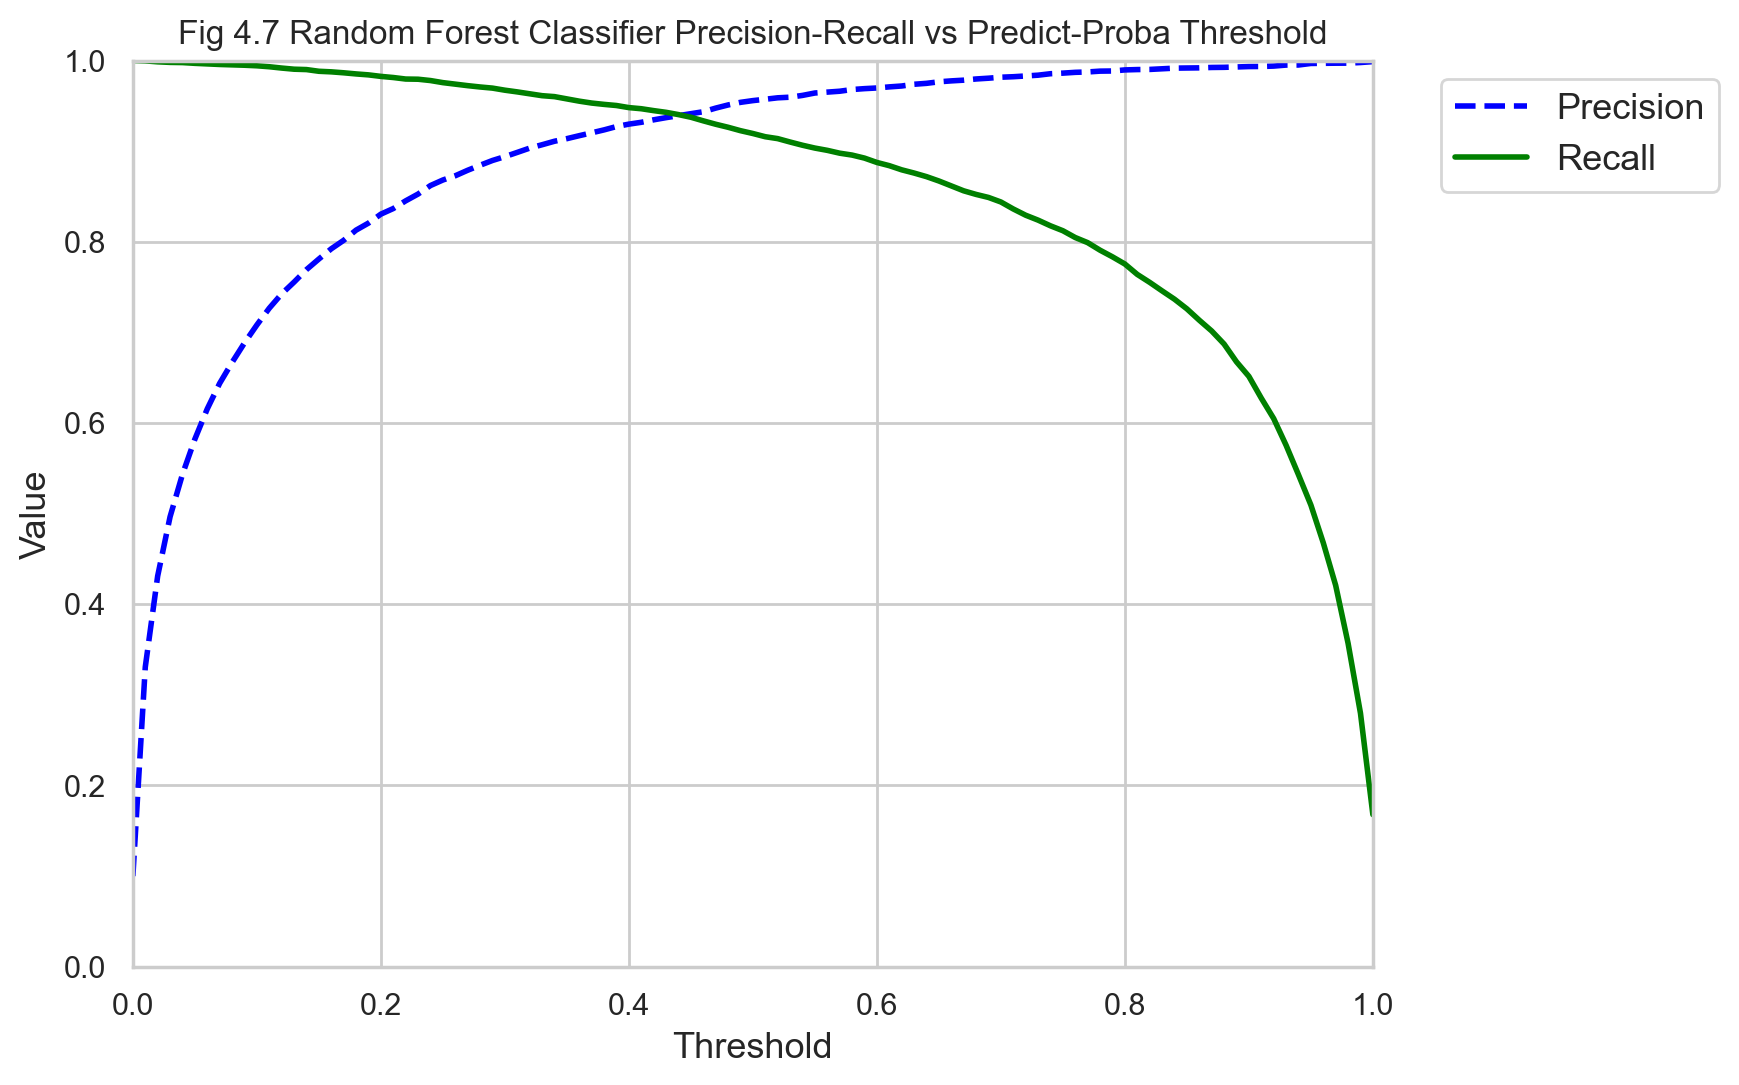

In [51]:
#plot precision-recall vs predict-proba threshold on random forest model
plt.figure(figsize=(8,6), dpi=200)
f.plot_precision_recall_vs_threshold(precisions_rf, recalls_rf, thresholds_rf)
plt.axis([0, 1, 0, 1])
plt.title('Fig 4.7 Random Forest Classifier Precision-Recall vs Predict-Proba Threshold')
plt.show()

In [52]:
pr_pp_rf = f.precision_recall_vs_threshold_df(thresholds_rf, precisions_rf, recalls_rf)
pr_pp_rf_grouped = pr_pp_rf.groupby('prediction_probability').mean()
pr_pp_rf_grouped

,precision,recall
prediction_probability,,
0.00,0.10,1.00
0.01,0.33,1.00
0.02,0.43,1.00
0.03,0.50,1.00
0.04,0.54,1.00
...,...,...
0.96,1.00,0.47
0.97,1.00,0.42
0.98,1.00,0.36


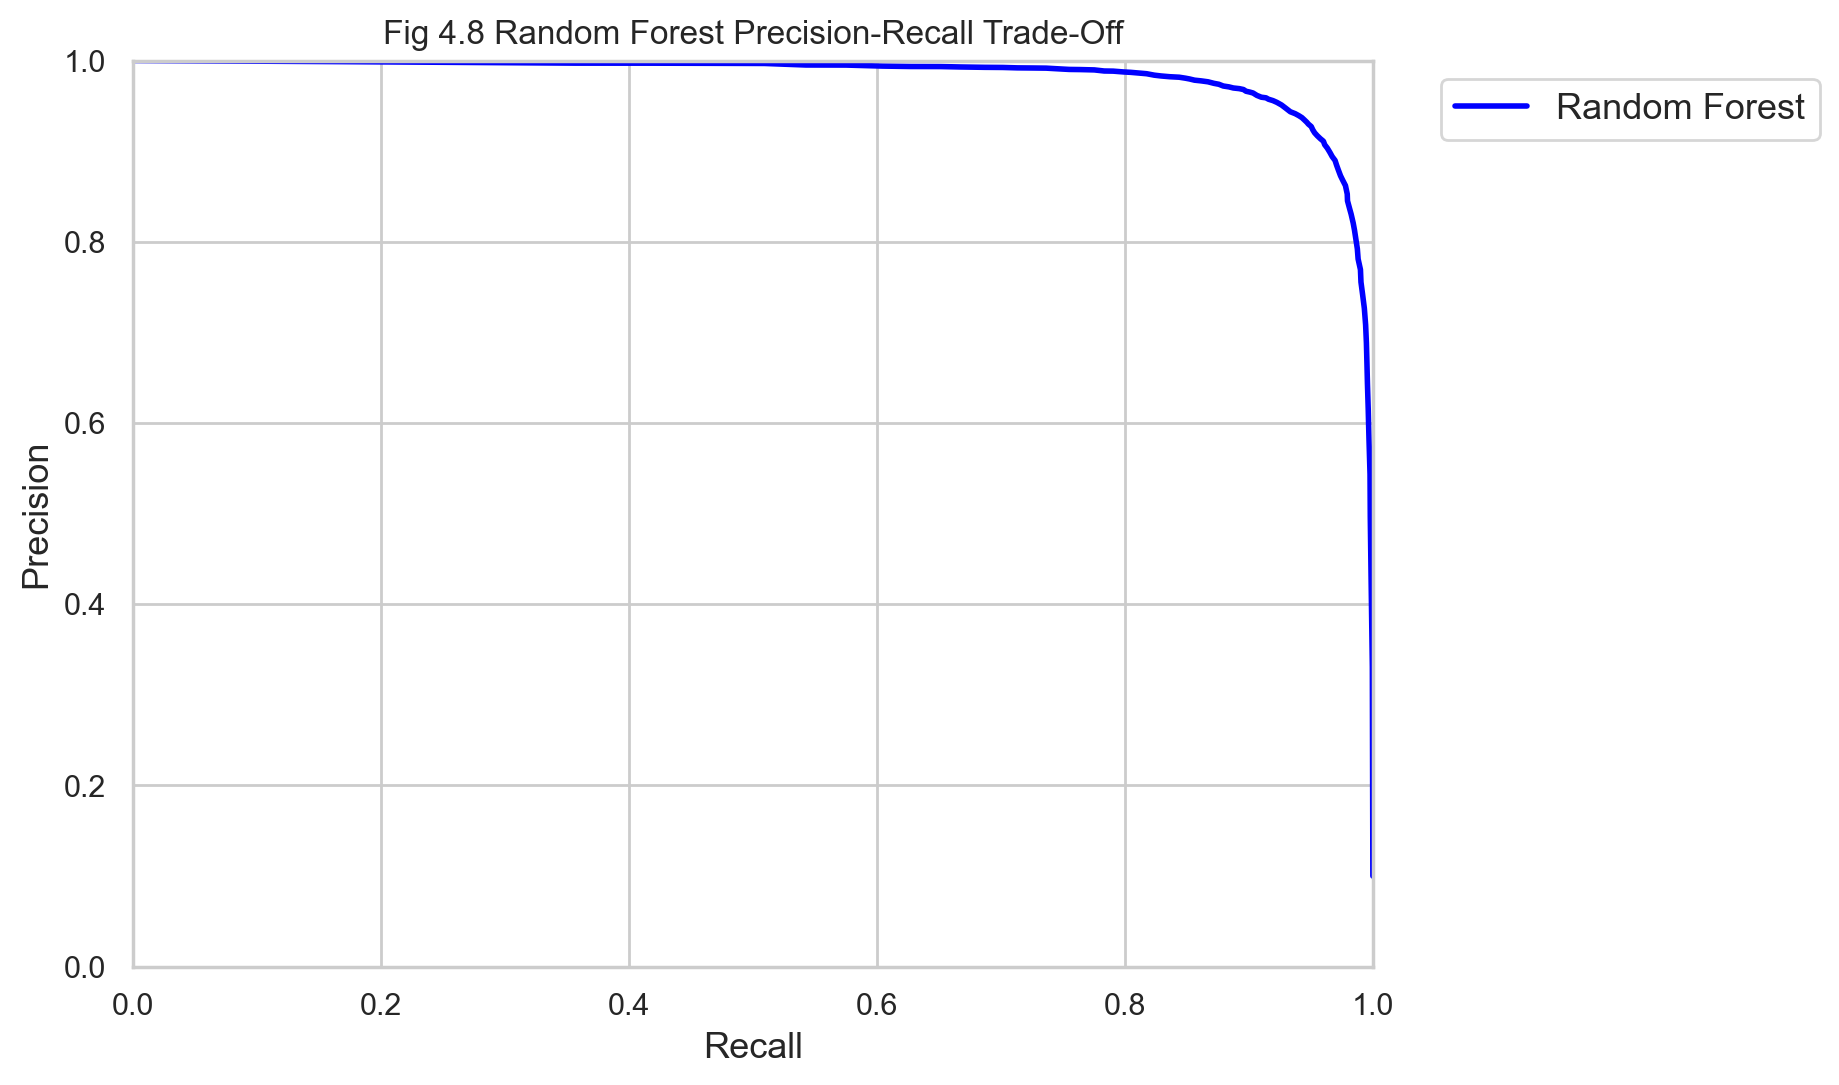

In [53]:
#plot precision-recall trade-off Random Forest Classifier model
plt.figure(figsize=(8, 6), dpi=200)
f.plot_precision_vs_recall(precisions_rf, recalls_rf, 'Random Forest')
plt.title('Fig 4.8 Random Forest Precision-Recall Trade-Off')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=13)
plt.show()

**Key Takeaway:**

XGBoost and LGBM classifier model precision-recall vs predict-proba threshold and precision-recall trade-off plot result are nearly identical. Meanwhile, there is a slight plot difference between Random Forest Classifier and XGBoost or LGBM. Here's the elaboration of each model's plot.


* In Fig 4.3 and Fig 4.5, both models provide similar performance on precision-recall vs predict probability plots. This plot shows how much precision-recall trade-off we need on a range of true class prediction probability. The range of the prediction probability threshold is from 0.0 (sure not true) to 1.0 (sure true). Let's say if we aim at a 0.001 prediction probability threshold (that means if we get 0.002 probability, then we consider that as true), we need to sacrifice the precision to about 0.35 (based on the plot) when the recall is near perfect. This happen because our models predicted too many true values. On the contrary, if we set the prediction probability threshold to 0.999, we need to sacrifice the performance of recall near 0.0 when the precision is near perfect. Why is the precision near perfect? because on the 0.999 threshold, models need to be 99,9% sure that the predicted values are true and the impact of that is the models is predicted too many false values. In other words, with an increasing prediction probability threshold, precision monotonically increases, while recall decreases (Donner, 2022).


* If we compare Fig 4.7 with Fig 4.3 and Fig 4.5, notice that the precision and recall line is steeper than XGBoost and LGBM models. This indicates that Random Forest models are not as robust as XGBoost and LGBM in terms of prediction probability threshold range. For instance, on 0.1 thresholds, the precision of Random Forest models starts decreasing quite significantly to 0.71 while on XGBoost and LGBM models precision stays above 0.90 (about 25% precision decrease on 0.5 thresholds).


* At a glance, there is no significant difference between XGBoost, LGBM, and Random Forest precision-recall trade-off (in Fig 4.4, Fig 4.6, and Fig 4.8), but there a slight differences when we compare the trade-off in every model on the same plot as you can see on Fig 4.9 below.

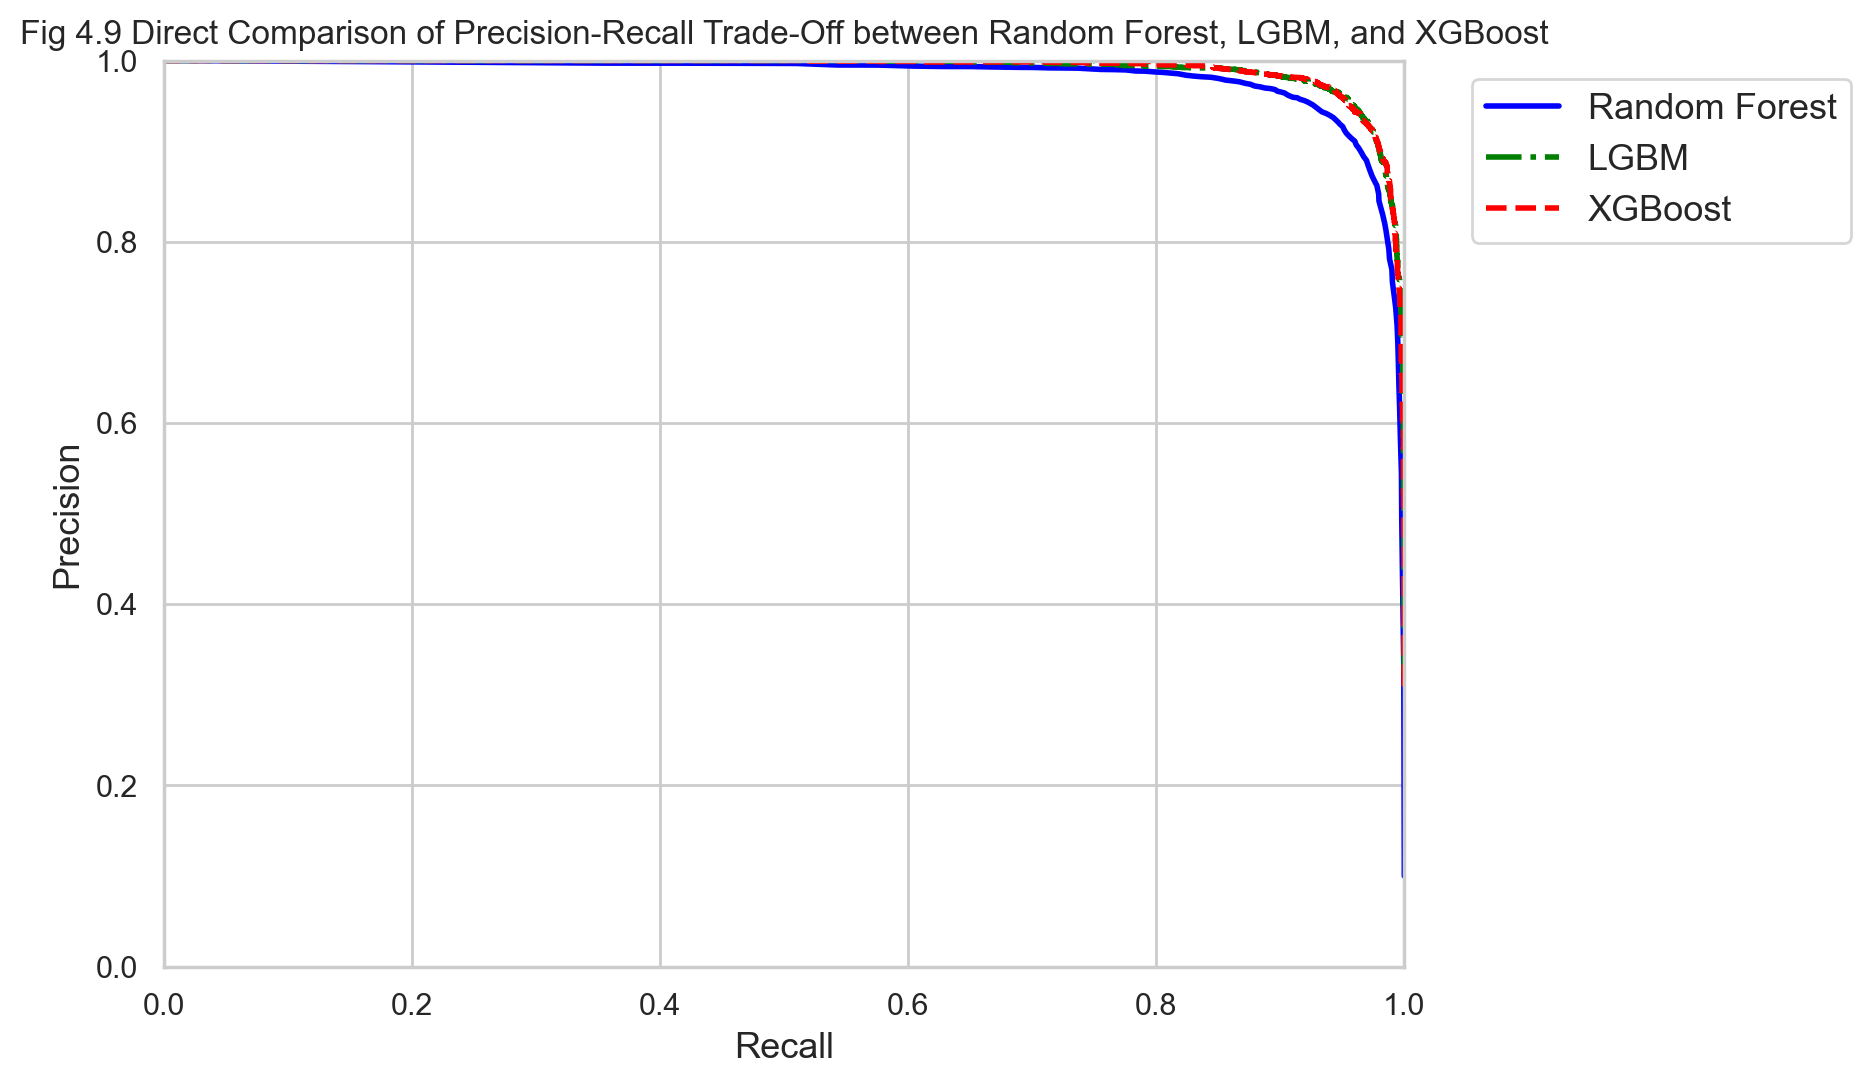

In [54]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(recalls_rf, precisions_rf, "b-", label='Random Forest', linewidth=2)
plt.plot(recalls_lgbm, precisions_lgbm, "g-.", label='LGBM', linewidth=2)
plt.plot(recalls_xgb, precisions_xgb, "r--", label='XGBoost', linewidth=2)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=13)
plt.xlabel("Recall", fontsize=13)
plt.ylabel("Precision", fontsize=13)
plt.axis([0, 1, 0, 1])
plt.title('Fig 4.9 Direct Comparison of Precision-Recall Trade-Off between Random Forest, LGBM, and XGBoost')
plt.grid(True)

* In Fig 4.9 above, LGBM and XGBoost yield precision-recall trade-off curvature line that leaned towards the upper right than Random Forest. This indicate that LGBM and XGBoost have better precision-recall trade-off than Random Forest. For comparison, on 0.9 recall, the precision of XGBoost, LGBM, and Random Forest consecutively is 0.98, 0.98, and 0.96. We can conclude that the more precision-recall trade-off curvature line lean towards the upper right the better. 

### 4.4.4 ROC Curve & AUC Score

In this section, we comparing the performance of ROC-AUC of all three classification models. ROC-AUC explanation is already mentioned in section 4.2 you can see it there. In brief, this ROC is trying to show how the trade-off between `true positive rate` and `false positive rate` while AUC is basically the area under ROC curvature.  

#### XGBoost Classifier

In [55]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train_ankle_boot, y_scores_xgb[:,1])

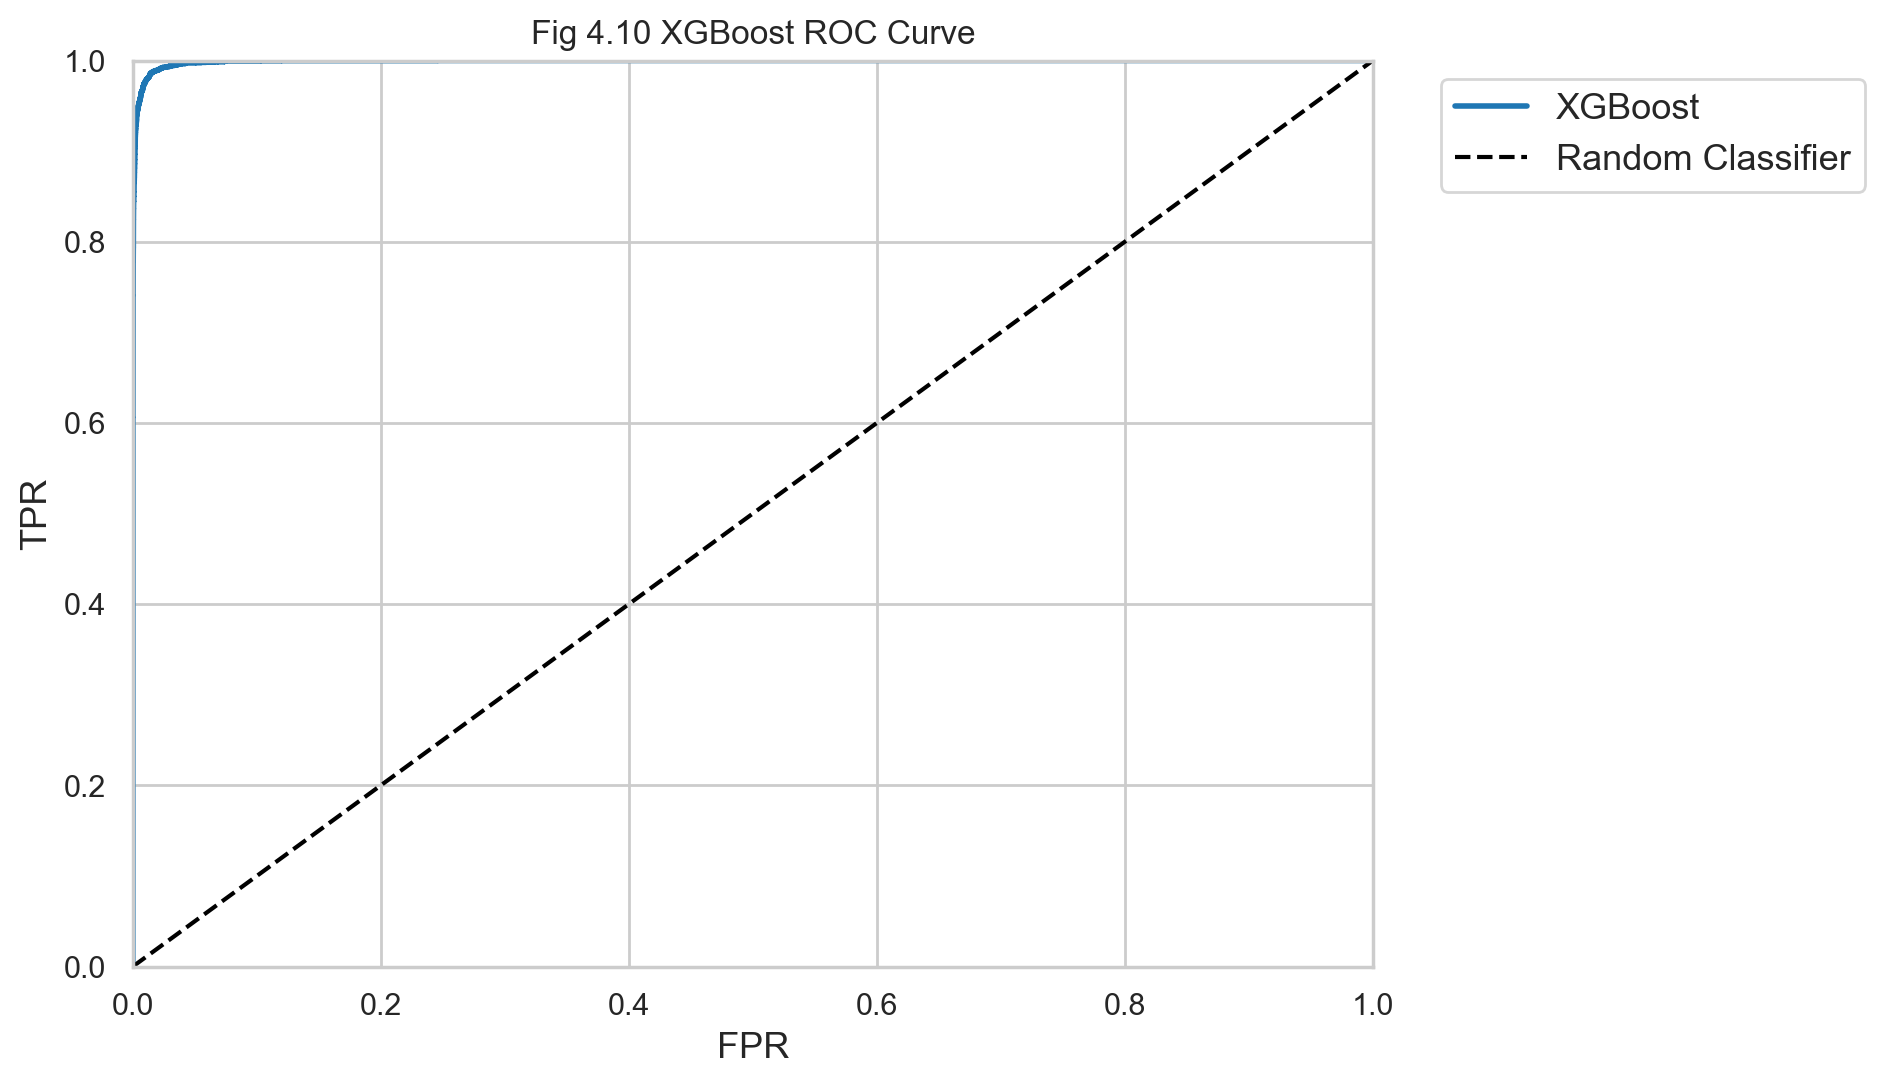

In [56]:
plt.figure(figsize=(8, 6), dpi=200)
plt.title('Fig 4.10 XGBoost ROC Curve')
f.plot_roc_curve(fpr_xgb, tpr_xgb, 'XGBoost')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=13)

In [57]:
print("XGBoost AUC Score: ", roc_auc_score(y_train_ankle_boot, y_scores_xgb[:,1]))

XGBoost AUC Score:  0.9989225074030358


#### LGBM Classifier

In [58]:
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_train_ankle_boot, y_scores_lgbm[:,1])

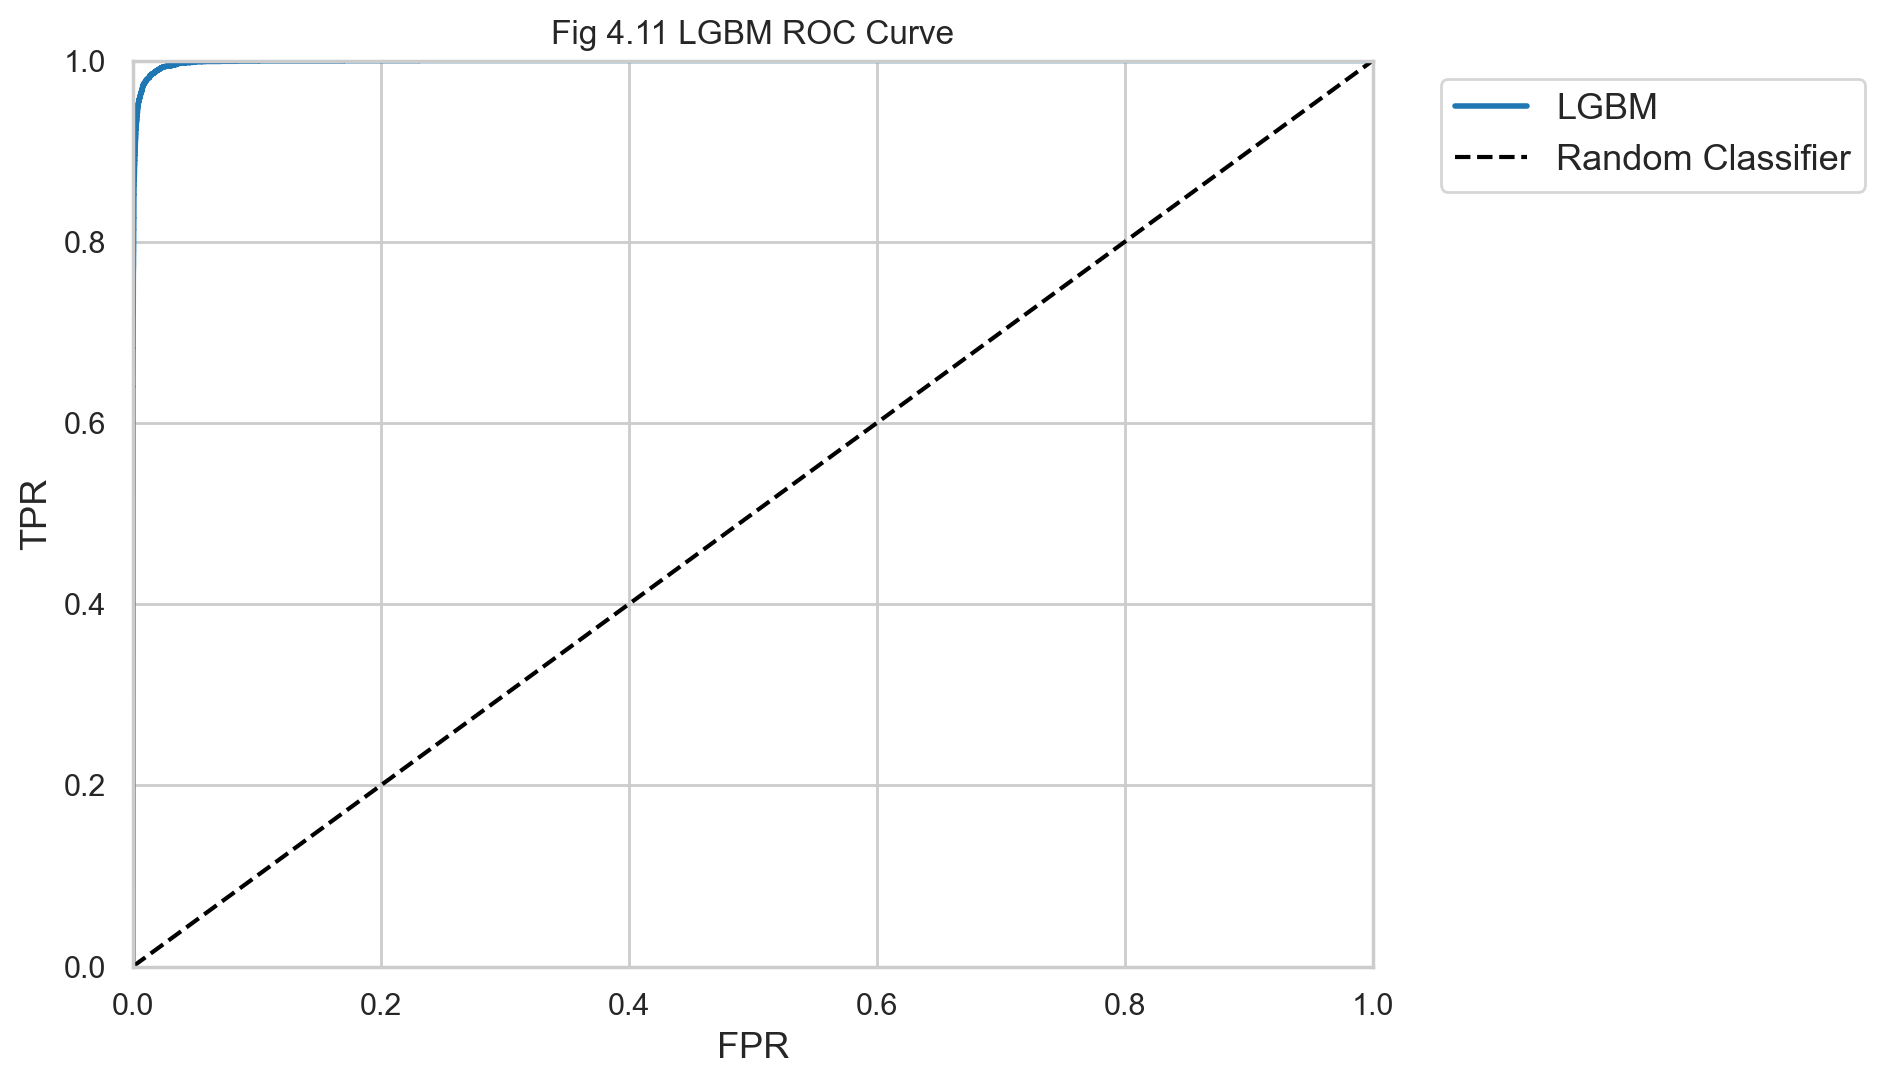

In [59]:
plt.figure(figsize=(8, 6), dpi=200)
plt.title('Fig 4.11 LGBM ROC Curve')
f.plot_roc_curve(fpr_lgbm, tpr_lgbm, 'LGBM')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=13)

In [60]:
print("LGBM AUC Score: ", roc_auc_score(y_train_ankle_boot, y_scores_lgbm[:,1]))

LGBM AUC Score:  0.9989219131309491


#### Random Forest Classifier

In [61]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_ankle_boot, y_scores_rf[:,1])

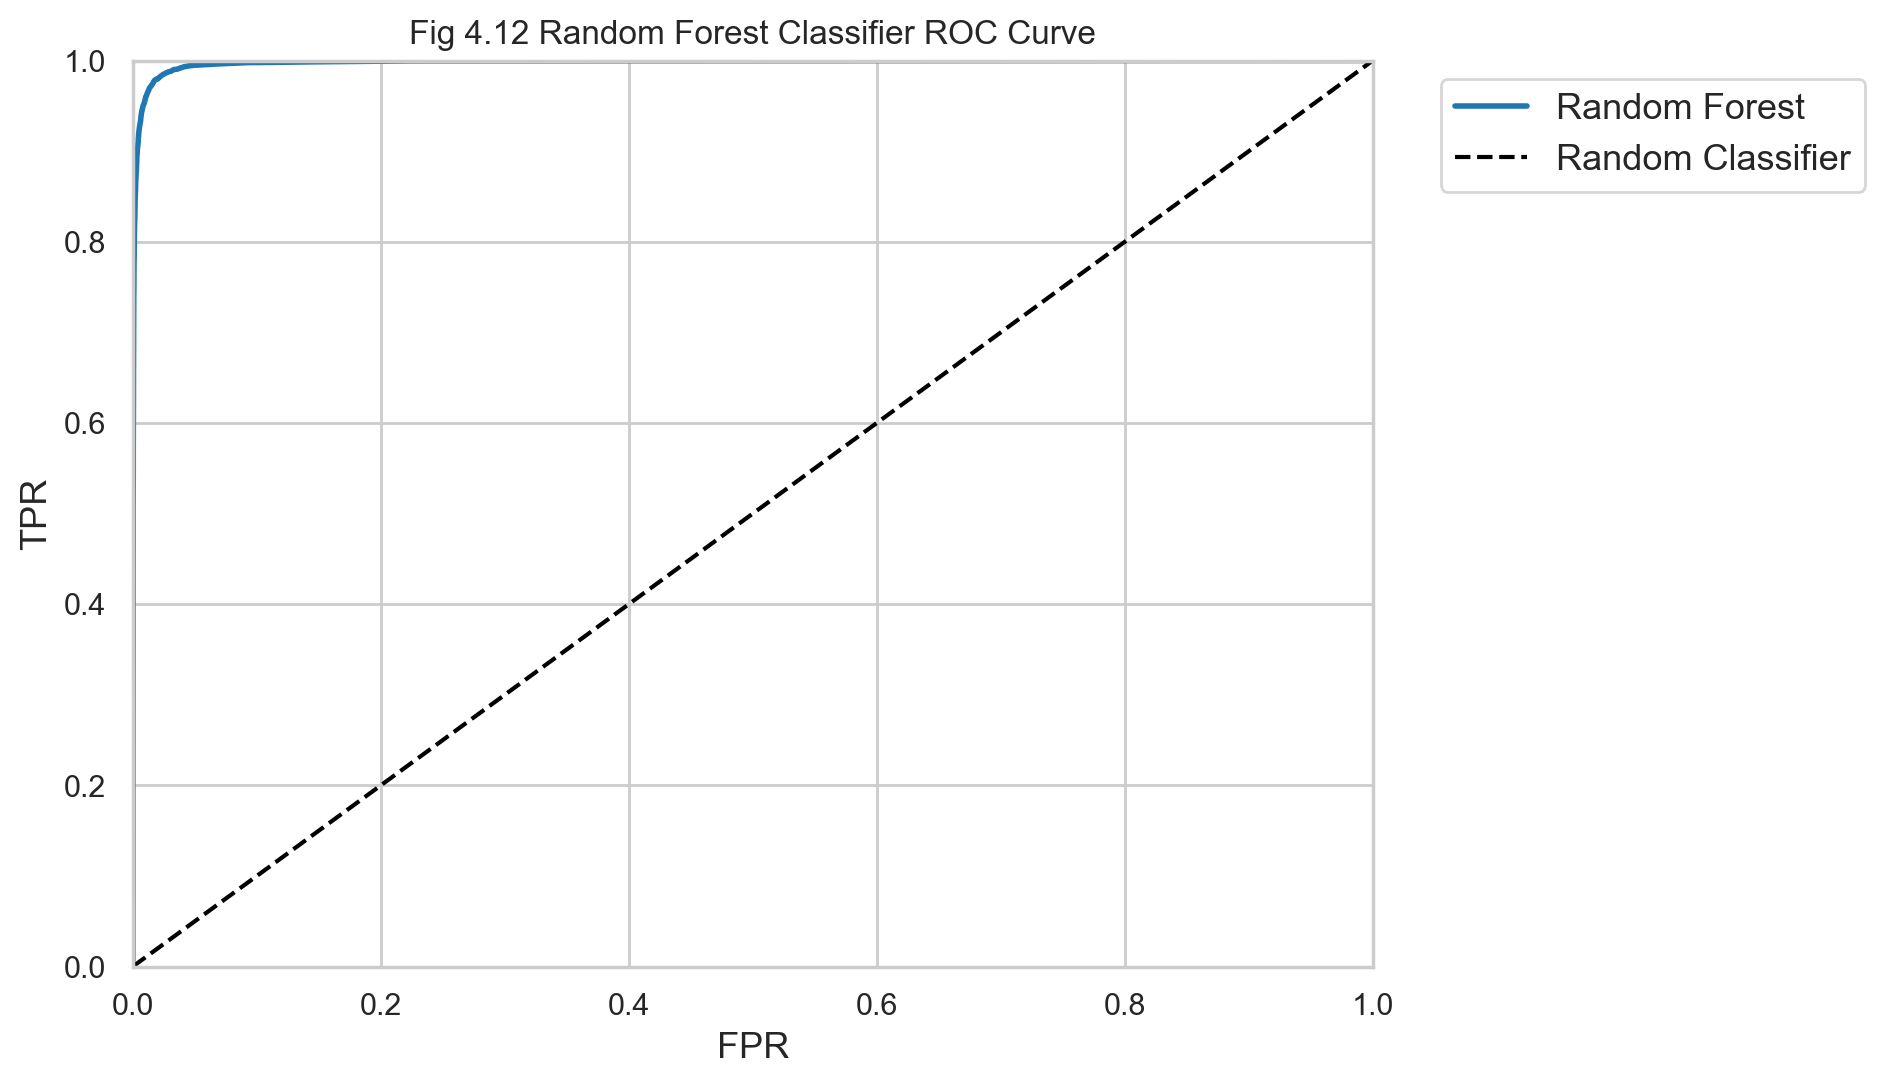

In [62]:
plt.figure(figsize=(8, 6), dpi=200)
plt.title('Fig 4.12 Random Forest Classifier ROC Curve')
f.plot_roc_curve(fpr_rf, tpr_rf, 'Random Forest')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=13)

In [63]:
print("Random Forest AUC Score: ", roc_auc_score(y_train_ankle_boot, y_scores_rf[:,1]))

Random Forest AUC Score:  0.9977401354457209


**Key Takeaway:**

* Overall, the results of all three models of ROC Curves are very satisfying! (don't be too complacent, it's just the training result) based on the rule of thumb of ROC curves that is already explained in section 4.2, the more curvature of the TPR-FPR trade-off leans towards the upper-left, the better the models. If you see Fig 4.10, Fig 4.11, and Fig 4.12, the curvature is so tight to the upper-left (almost perfect) this shows that with less `FPR` the models can yield high `TPR`.


* There are almost no differences between the three models' ROC curves. But actually, there are slight differences if you see the AUC score. Overall AUC score of XGBoost and LGBM is relatively the same, but the AUC score of Random Forest is slightly lesser than the other two models (still almost no differences :)).


* In order to see the plot differences between the three models, we comparing the ROC Curve in the same canvas in Fig 4.13 below.

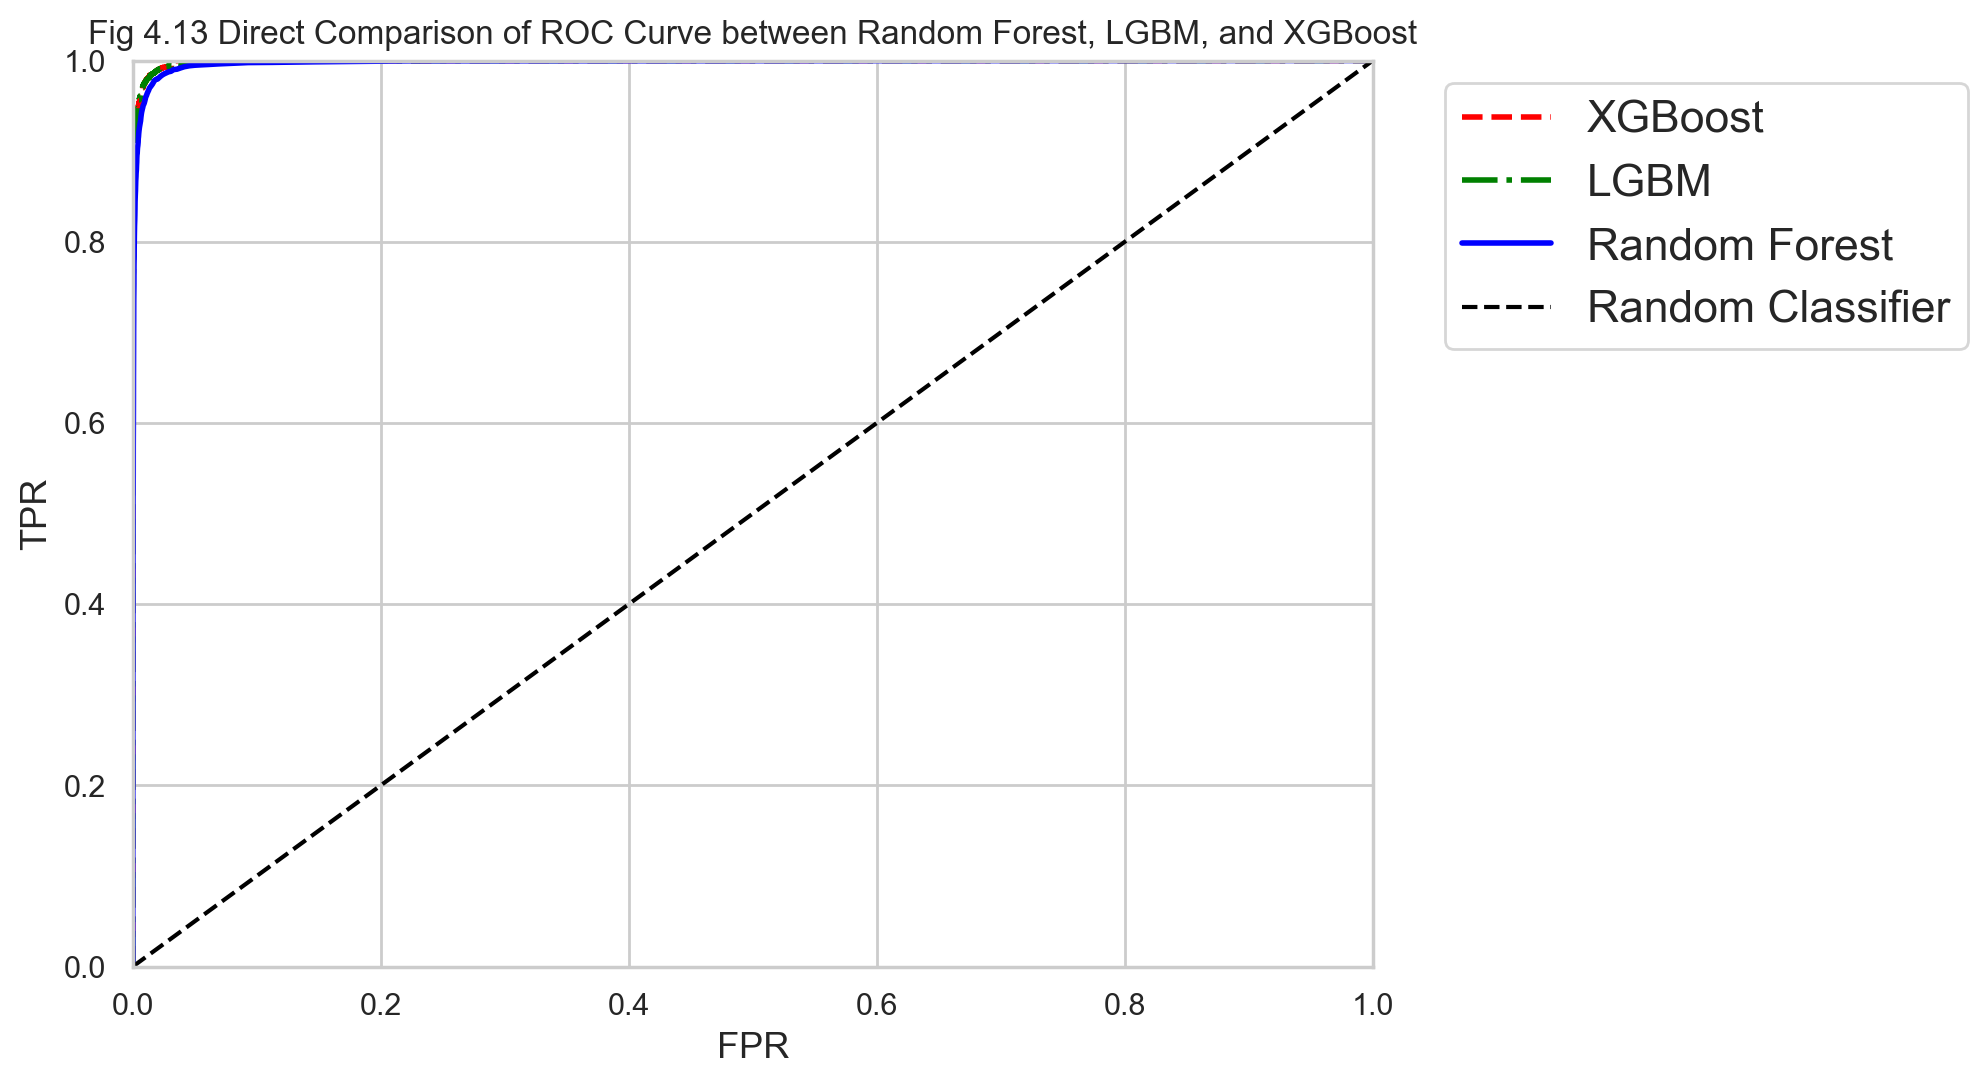

In [64]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(fpr_xgb, tpr_xgb, "r--", label='XGBoost', linewidth=2)
plt.plot(fpr_lgbm, tpr_lgbm, "g-.", label='LGBM', linewidth=2)
plt.plot(fpr_rf, tpr_rf, "b", label='Random Forest', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=16)
plt.xlabel('FPR', fontsize=13)
plt.ylabel('TPR', fontsize=13)
plt.axis([0, 1, 0, 1])
plt.title('Fig 4.13 Direct Comparison of ROC Curve between Random Forest, LGBM, and XGBoost')
plt.grid(True)

* As you see in Fig 4.13, there are no differences between the three models. But, when we zoom in on the graph (Fig 4.14) close enough, you can see the gap between Random Forest and XGBoost or LGBM. XGBoost and LGBM are more leaning towards the upper-left than Random Forest. This indicates that the XGBoost and LGBM are overall better models than Random Forest on the ROC curve.

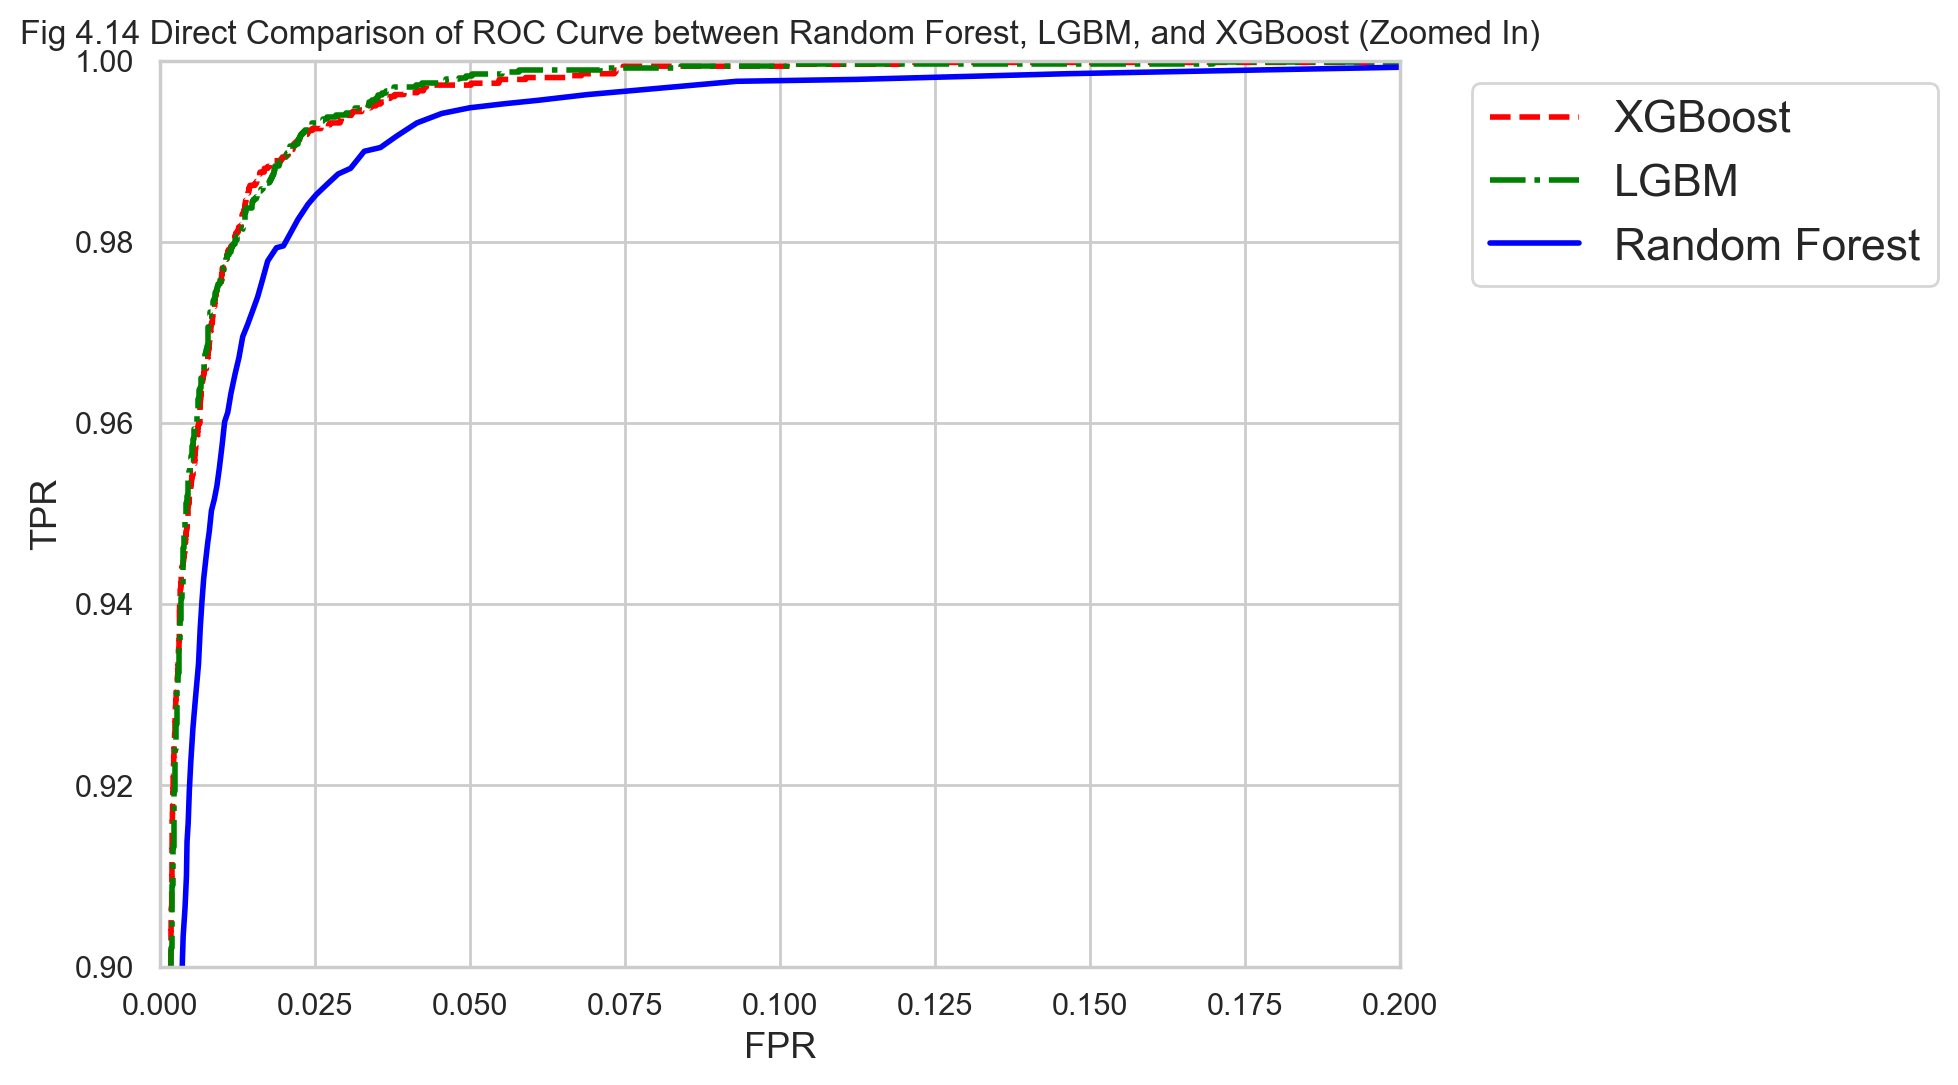

In [65]:
plt.figure(figsize=(8, 6), dpi=200)
plt.plot(fpr_xgb, tpr_xgb, "r--", label='XGBoost', linewidth=2)
plt.plot(fpr_lgbm, tpr_lgbm, "g-.", label='LGBM', linewidth=2)
plt.plot(fpr_rf, tpr_rf, "b", label='Random Forest', linewidth=2)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", fontsize=16)
plt.xlabel('FPR', fontsize=13)
plt.ylabel('TPR', fontsize=13)
plt.axis([0, 0.2, 0.9, 1])
plt.title('Fig 4.14 Direct Comparison of ROC Curve between Random Forest, LGBM, and XGBoost (Zoomed In)')
plt.grid(True)

# 5. Training Multi-Class Classifiers

After a long binary classifier journey , we finally doing multi-class classification . Why is it necessary to understand the binary classifier in the first place? because the concept of multi-class classifier is basically the same as binary (we're get into that). There is some model that can perform multi-class classification natively like Random Forest, Stochastic Gradient Descent, etc. Then what happen when we use the models that can't perform multi-class classification task natively? Don't worry there is a way to that certain condition if you understand the strategy of multi-class classification. Two strategy we need to understand to perfom multi-class classification, `One-Versus-One (OvO)` and `One-Versus-Rest (OvR)` strategy:

* `OvO` strategy is basically training a binary classifier for every pair of fashion name. For example first binary classifier to distinguish `ankle boot` and `bag`, second binary classifier to distinguish `ankle boot` and `coat`, third binary classifier to distinguish `ankle boot` and `dress`, and so on. If there is `N` class, then we need to train `N x (N-1)/2` classifier. In this case, we have 10 class and that mean we need to train 45 models (sheesh that a lot of work). Luckily, sklearn already think the solution and came up with [sklearn.multiclass.OneVsOneClassification](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html).


* `OvR` strategy is relatively simpler than `OvO` because this strategy is training binary classifier(s) as much as number of class. In this case, we have 10 class then there is 10 binary classifier, one for each digit (`ankle boot` detector, `bag` detector, `dress` detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This strategy is also available on sklearn module that is [sklearn.multiclass.OneVsRestClassification](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html).

## 5.1 Training Strategy

### 5.1.1 One vs One Strategy

This section aims to demonstrate how to use the sklearn library to perform the OvR strategy for the multiclassification task for all three models that we already used in the binary classifier.

#### XGBoost

In [66]:
ovo_xgb = OneVsOneClassifier(xgb_clf)
ovo_xgb.fit(X_train, y_train)
ovo_xgb.predict([ankle_boot])

array([9], dtype=uint8)

#### LGBM Classifier

In [67]:
ovo_lgbm = OneVsOneClassifier(lgbm_clf)
ovo_lgbm.fit(X_train, y_train)
ovo_lgbm.predict([ankle_boot])

array([9], dtype=uint8)

#### Random Forest Classifier

In [68]:
ovo_rf = OneVsOneClassifier(rf_clf)
ovo_rf.fit(X_train, y_train)
ovo_rf.predict([ankle_boot])

array([9], dtype=uint8)

### 5.1.2 One vs Rest Strategy

This section aims to demonstrate how to use sklearn library to perform OvR strategy for multiclassification task for all three models that we already used in binary classifier.

#### XGBoost

In [69]:
ovr_xgb = OneVsRestClassifier(xgb_clf)
ovr_xgb.fit(X_train, y_train)
ovr_xgb.predict([ankle_boot])

array([9], dtype=uint8)

#### LGBM

In [70]:
ovr_lgbm = OneVsRestClassifier(lgbm_clf)
ovr_lgbm.fit(X_train, y_train)
ovr_lgbm.predict([ankle_boot])

array([9], dtype=uint8)

#### Random Forest Classifier

In [71]:
ovr_rf = OneVsRestClassifier(rf_clf)
ovr_rf.fit(X_train, y_train)
ovr_rf.predict([ankle_boot])

array([9], dtype=uint8)

OvO and OvR strategies generate the same (correct) prediction result on sample data. But what strategy is preferable? Based on a good article by Bex T. on [medium](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd), the OvO strategy presents more computational drawbacks than OvR (which makes sense since the OvO strategy needs to train 45 different models than OvR which only require only 10 different models to classify this fashion case). Because of that, professionals prefer using the OvR approach.

## 5.2 Multi-Class Classifier Performance Measures

In this section, we want to demonstrate performance measures on multiclassification task. For instance, the model and strategy that we're going to see is XGBoost with OvR strategy.

In [72]:
y_pred_ovr_xgb = cross_val_predict(ovr_xgb, X_train, y_train, cv=3)

### 5.2.1 Confusion Matrix

<Figure size 1600x1200 with 0 Axes>

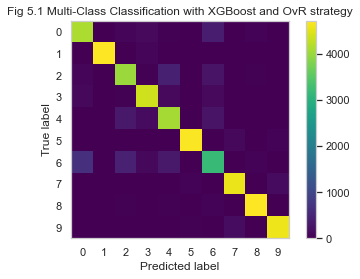

In [73]:
plt.figure(figsize=(8, 6), dpi=200)
cm_ovr_xgb = confusion_matrix(y_train, y_pred_ovr_xgb, labels=ovr_xgb.classes_)
cm_ovr_xgb_disp = ConfusionMatrixDisplay(confusion_matrix=cm_ovr_xgb, display_labels=ovr_xgb.classes_)
cm_ovr_xgb_disp.plot(include_values=False)
plt.grid(False)
plt.title('Fig 5.1 Multi-Class Classification with XGBoost and OvR strategy')
plt.show()

In [74]:
cm_ovr_xgb_df = pd.DataFrame(cm_ovr_xgb)
print('Table 5.1 Multi-Class Classification with XGBoost and OvR strategy')
cm_ovr_xgb_df

Table 5.1 Multi-Class Classification with XGBoost and OvR strategy


,0,1,2,3,4,5,6,7,8,9
0,4140,1,64,121,23,2,378,0,39,0
1,8,4715,5,67,8,0,18,0,5,0
2,64,2,4006,35,415,0,256,0,22,0
3,104,9,29,4368,126,1,113,0,8,0
4,9,5,321,137,4086,0,247,0,10,0
5,0,0,0,2,0,4693,1,104,11,48
6,643,6,437,104,315,0,3199,0,53,0
7,0,0,0,0,0,42,0,4580,8,146
8,5,5,23,13,26,12,45,10,4707,5
9,0,0,1,4,0,31,0,154,4,4596


Confusion matrix on a binary classifier is easy to follow and makes more sense since there are only True (1) or False (0) values while the confusion matrix on a multi-class classifier in which the class is more than 2 is truly confusing (just like its name). 

But, don't be confused because the concept is the same, we also can calculate recall, precision, or F1 score on the multi-class classification task. The only difference between binary and multiclass classifiers is we need to calculate the recall, precision, or F1 score on every class. Luckily, sklearn already created a function to calculate recall, precision, F1 score, and even the average and weighted average of recall, precision, and F1 score. The function is [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [75]:
print(classification_report(y_train, y_pred_ovr_xgb))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4768
           1       0.99      0.98      0.99      4826
           2       0.82      0.83      0.83      4800
           3       0.90      0.92      0.91      4758
           4       0.82      0.85      0.83      4815
           5       0.98      0.97      0.97      4859
           6       0.75      0.67      0.71      4757
           7       0.94      0.96      0.95      4776
           8       0.97      0.97      0.97      4851
           9       0.96      0.96      0.96      4790

    accuracy                           0.90     48000
   macro avg       0.90      0.90      0.90     48000
weighted avg       0.90      0.90      0.90     48000



**Key Takeaways:**

* From the classification report above, we can see the precision, recall, and f1 score of each class. There is a macro average and weighted average to summarize the overall multi-class classification models' performance. The macro average is the mean of individual classes while the weighted average included or considers the sample size of each class. 


* Why are the calculated macro and weighted average from the classification report above equal? this happened because the sample size of each class is the same (as we already mentioned in Fig 3.2) so the weight is also equal.


* Class with the worst performance is class 6 or `shirt` with precision, recall, and f1 scores of only 0.75, 0.67, and 0.71 consecutively. In Fig 5.1, we can clearly see the color of the heatmap of the `shirt` class on row 6 and column 6 is more bluish compared to other class that is more yellowish or greenish. What exactly happened with the `shirt` class? if you look at Table 5.1, the models misinterpret the 0 (`t-shirt/top`) as 6 (`shirt`) 643 times. Based on the class name, I think the model is slightly confused to differentiate between `shirt` and `t-shirt/top`. What if we look at the actual image of `shirt` and `t-shirt/top`?

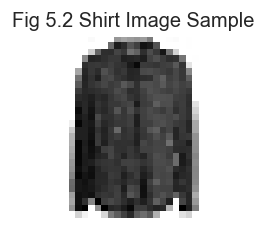

In [76]:
shirt = X[2]
shirt_image = shirt.reshape(28, 28)
plt.figure(figsize=(2,2), dpi=120)
plt.imshow(shirt_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.title('Fig 5.2 Shirt Image Sample')
plt.show()

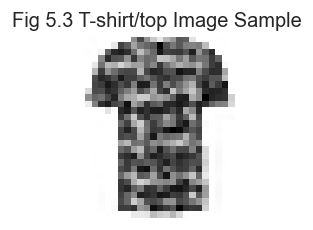

In [77]:
t_shirt = X[3]
t_shirt_image = t_shirt.reshape(28, 28)
plt.figure(figsize=(2,2), dpi=120)
plt.imshow(t_shirt_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.title('Fig 5.3 T-shirt/top Image Sample')
plt.show()

* As you can see from the image of `shirt` and `t-shirt` above, the similarity of the image might be the factor the model misinterpret class 0 as 6. Not only that, based on Fig 5.1 above, the model also misinterpreted class 6 as 0 (378 times). To overcome this situation, we need to perform some manipulation of the datasets like data standardization or feature engineering. 

### 5.2.2 One-vs-Rest ROC Curve & AUC Score

We can also plot ROC and calculate AUC for each class to evaluate which class yields the best or worst performance.

In [78]:
y_score_ovr_xgb = cross_val_predict(ovr_xgb, X_train, y_train, cv=3, method='predict_proba')

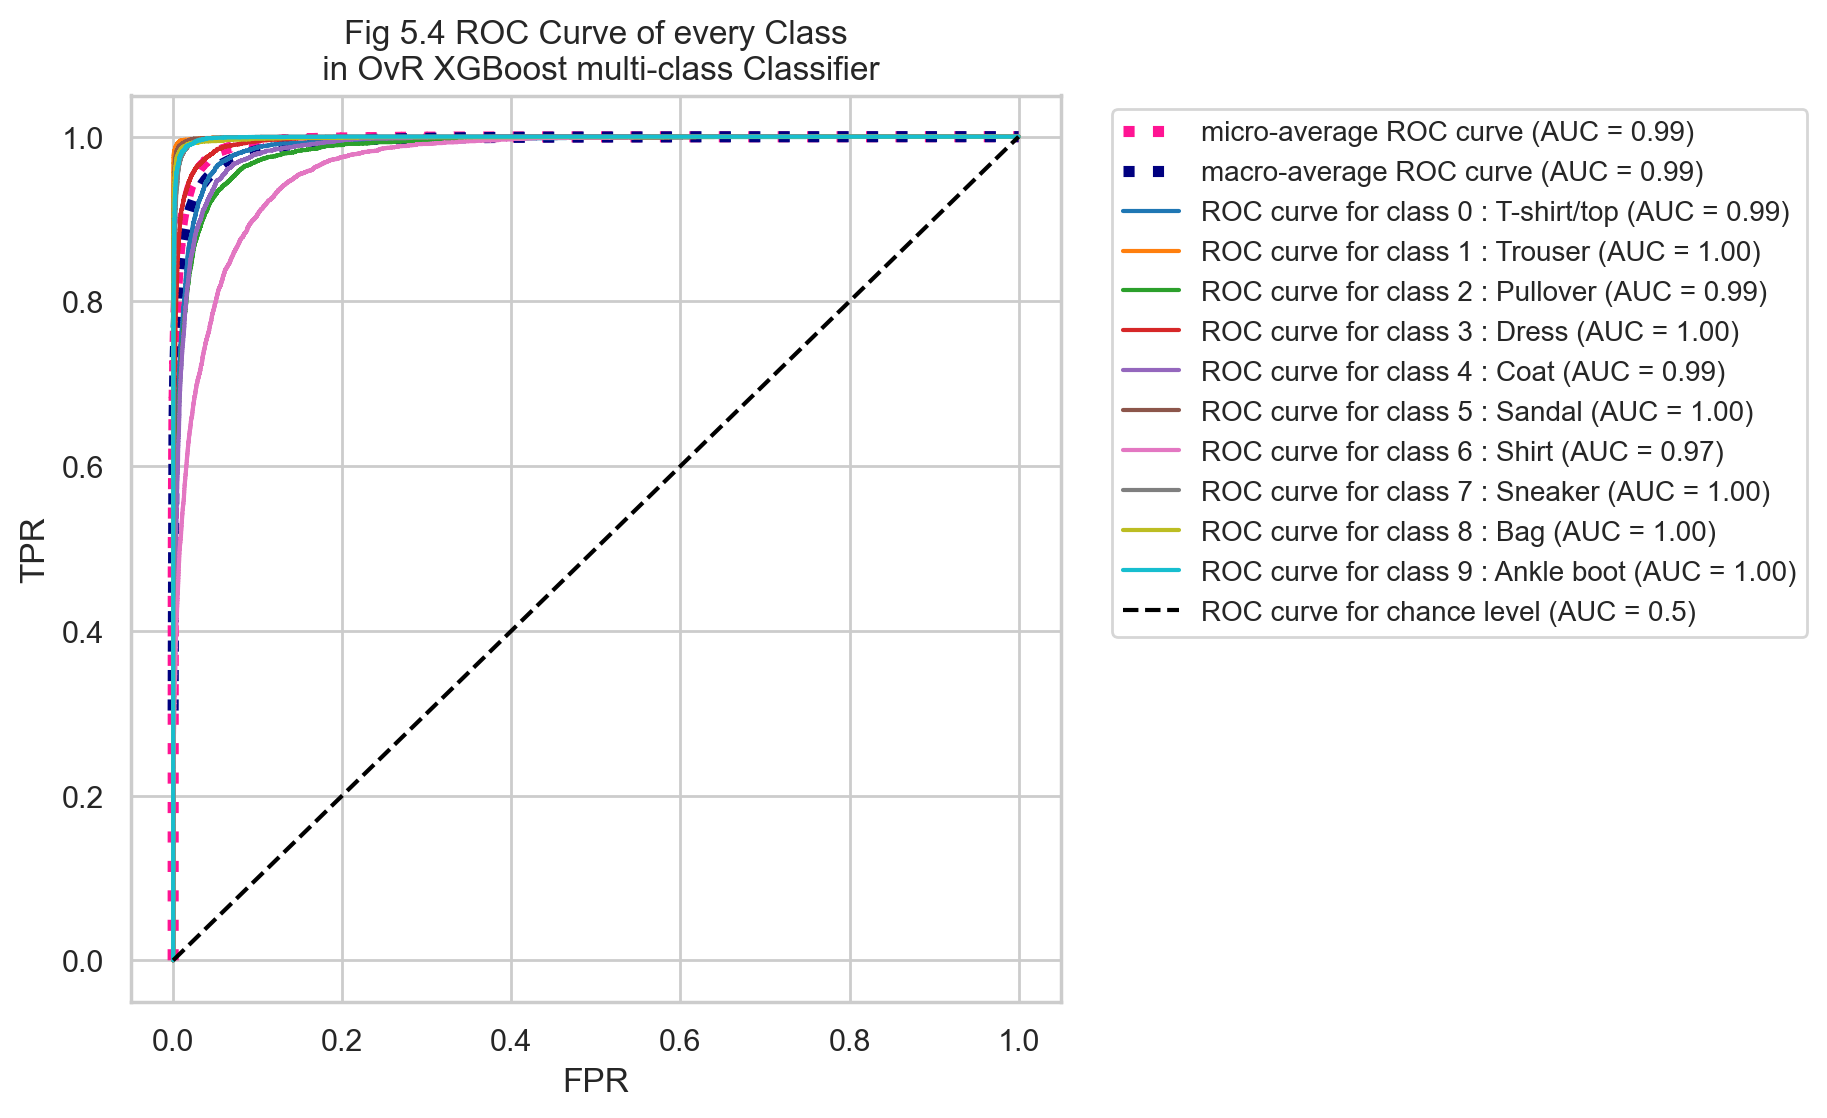

In [79]:
f.plot_multiclass_roc_curve(y, y_train, y_score_ovr_xgb, label)
plt.title("Fig 5.4 ROC Curve of every Class\n in OvR XGBoost multi-class Classifier")
plt.show()

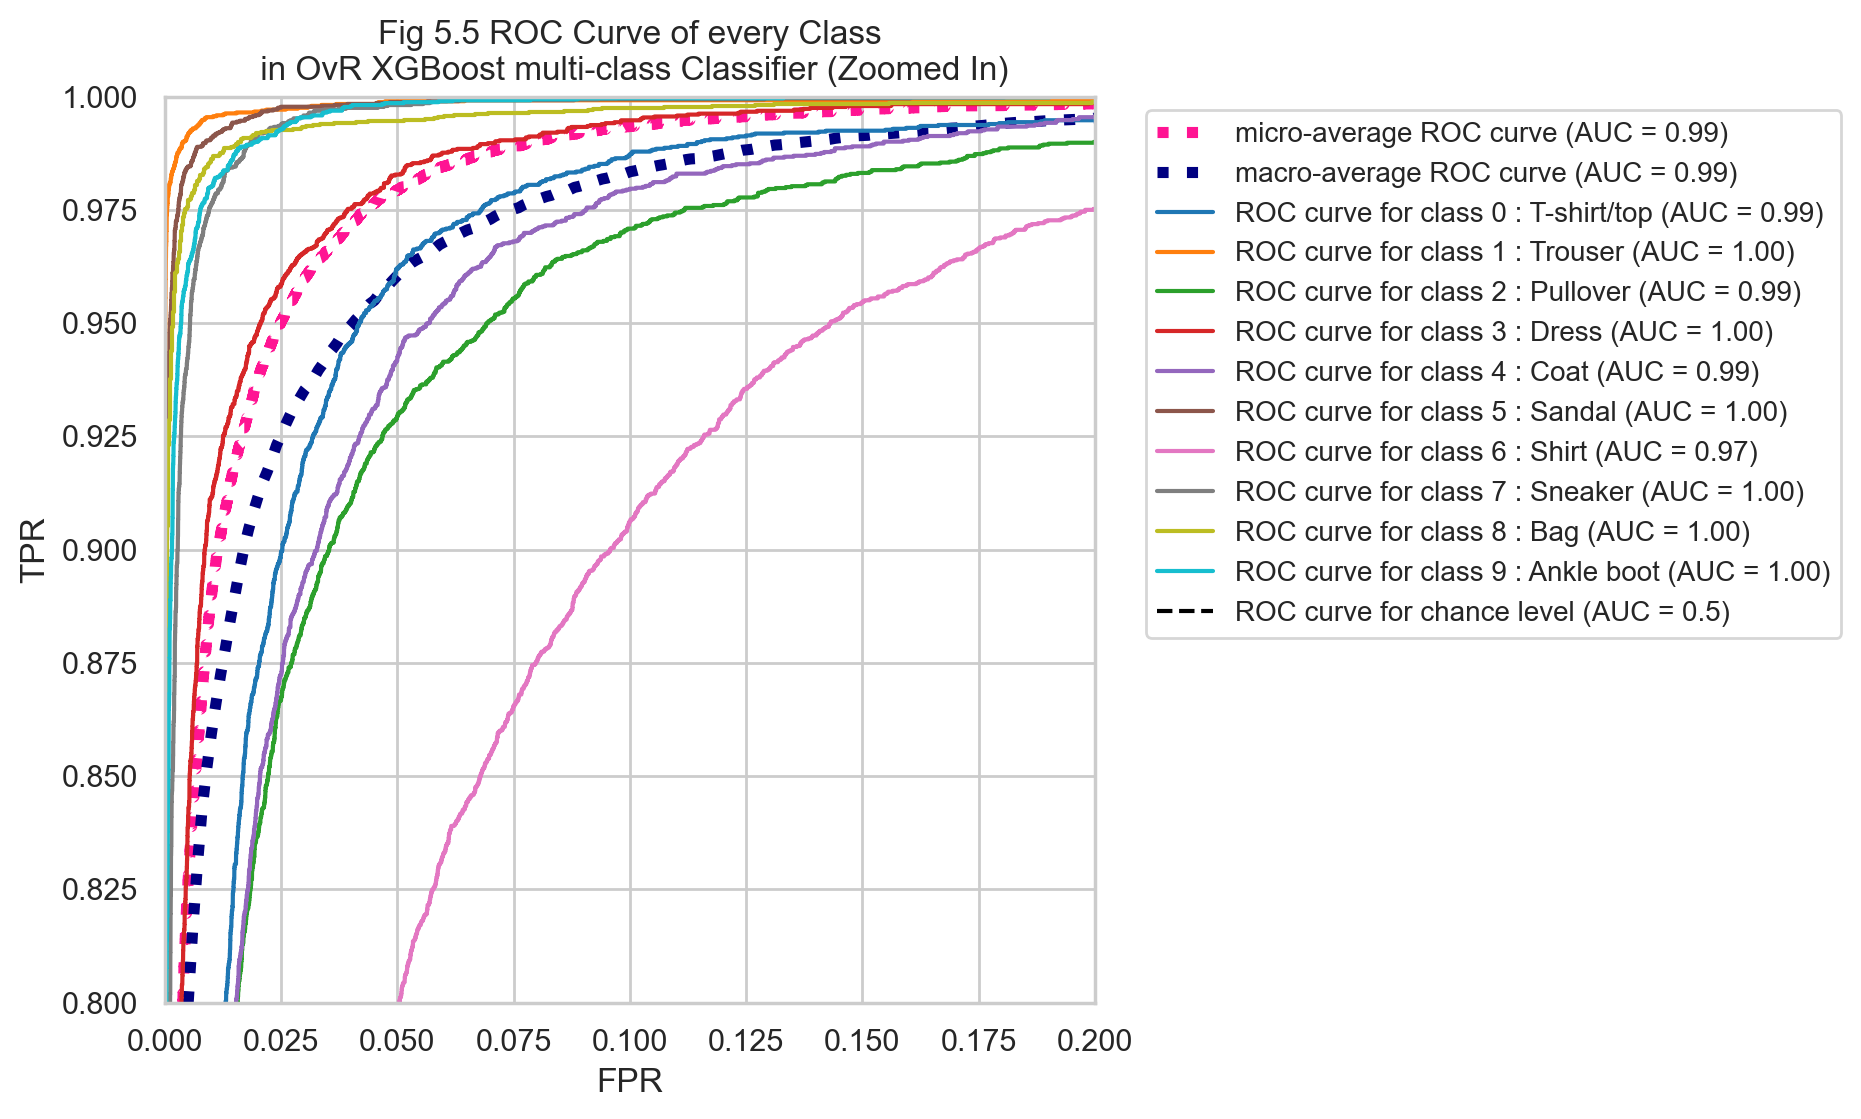

In [80]:
f.plot_multiclass_roc_curve(y, y_train, y_score_ovr_xgb, label)
plt.axis([0, 0.2, 0.8, 1])
plt.title("Fig 5.5 ROC Curve of every Class\n in OvR XGBoost multi-class Classifier (Zoomed In)")
plt.show()

**Key Takeaways:**

* As you can see in Fig 5.4, class 6 (`shirt`) is the worst performance class in terms of the ROC curve and AUC score. But, don't get it wrong, it still delivers a pretty good performance shown by AUC score = 0.97. by "worst" I mean if we compare class 6 with other classes it becomes less good. Then if we zoomed in on Fig 5.4 plot as you can see in Fig 5.5, class 6 is far below the micro-average or weighted-average, or macro-average ROC curve.


* If we set micro-average ROC as the benchmark of our model performance, 6 classes (class 1: `trouser`, class 3: `dress`, class 5: `sandal`, class 7: `sneaker`, class 8: `bag`, dan class 9: `ankle boot`) is above micro-average ROC and the 4 rest is below it (class 0: `t-shirt/top`, class 4: `coat`, class 2: `pullover`, and class 6: `shirt`). 